# Data Visualization

In [105]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

### Graphs

In [8]:
file_path = "/home/mathilde/code/lionelgendebien/fake-no-more/raw_data/data_3000_mean.parquet"
df_mean = pd.read_parquet(file_path, engine="pyarrow")
df_mean

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,spectral_contrast_band_3,spectral_contrast_band_4,spectral_contrast_band_5,spectral_contrast_band_6,spectral_contrast_band_7,zero_crossing_rate,spectral_bandwidth,spectral_rolloff,speaker,label
0,-438.902466,131.049179,31.964193,13.393257,-10.851934,21.466110,15.682505,-15.501030,-0.921604,-6.076500,...,20.795151,21.698178,21.533019,24.282488,27.026643,0.047546,1424.026351,2587.890625,Alec Guinness,spoof
1,-416.698486,107.165154,36.987560,-25.338993,24.254765,17.841396,5.545230,-5.548047,-11.765963,29.313616,...,16.665631,15.596144,22.698796,27.235966,30.661490,0.291443,1992.659393,4335.693359,Alec Guinness,spoof
2,-399.090576,100.394608,-11.134040,8.043594,-15.920973,0.263590,-17.844347,-9.248442,-12.350135,-1.866052,...,22.990385,19.937696,20.584322,21.973115,27.212875,0.094574,1360.364361,2640.625000,Barack Obama,spoof
3,-378.475098,90.858200,-11.009722,24.767319,-3.636064,11.066898,5.864827,-6.301200,2.463275,-8.265955,...,19.357128,17.208036,20.855476,24.360349,27.273555,0.177216,1405.495204,3232.421875,Alec Guinness,spoof
4,-349.554871,104.047050,-21.938389,3.713329,-6.836427,-2.341877,-19.791124,-4.656781,-16.517565,-4.638919,...,14.927925,15.033009,15.990275,16.221883,29.096614,0.125614,1559.527981,3203.881048,Christopher Hitchens,bona-fide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,-243.222717,129.675049,8.831158,17.186152,-6.703626,5.246326,-0.563948,1.134507,-9.134624,-4.987175,...,19.757991,19.297538,16.702728,17.364491,30.650644,0.045273,1415.921310,1895.996094,Ronald Reagan,bona-fide
2997,-349.768433,74.099510,21.200359,17.398546,-20.232716,-12.421755,-22.934311,-8.966787,-23.687263,-6.565481,...,21.907771,21.216269,22.068208,22.050339,29.957695,0.090485,1159.637859,2149.414062,Boris Johnson,spoof
2998,-271.862183,55.174667,-18.886616,9.044554,-13.289955,5.369859,-19.380035,-10.381810,-12.407303,-7.678885,...,19.834597,18.499413,19.301683,20.026658,32.735047,0.153168,1754.603562,4106.933594,Jerry Seinfeld,spoof
2999,-469.104004,85.494156,-0.167773,-1.805922,-5.917750,-4.685134,-20.941681,-9.877802,-11.946209,1.881553,...,18.779414,17.799768,18.945600,16.743863,28.974511,0.093704,1696.848032,3261.962891,Barack Obama,bona-fide


In [9]:
file_path = "/home/mathilde/code/lionelgendebien/fake-no-more/raw_data/master_audio_df_3000_all.parquet"
df_all = pd.read_parquet(file_path, engine="pyarrow")
df_all

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,spectral_contrast_band_3,spectral_contrast_band_4,spectral_contrast_band_5,spectral_contrast_band_6,spectral_contrast_band_7,zero_crossing_rate,spectral_bandwidth,spectral_rolloff,speaker,label
0,-622.401672,41.370731,34.226227,23.601780,18.185989,16.151962,12.444486,8.757935,8.126992,4.264644,...,14.465466,20.020780,15.946221,18.904040,12.887562,0.046387,2564.734419,6148.4375,Alec Guinness,spoof
1,-617.704895,40.262421,34.641960,24.769947,17.736048,18.208900,11.729778,13.104420,9.797087,5.084984,...,22.098385,18.684063,19.048777,22.021811,18.769564,0.068848,2463.255087,5875.0000,Alec Guinness,spoof
2,-621.407898,37.493393,34.536301,24.422443,19.267277,20.783823,12.910913,12.591597,13.045374,10.501230,...,23.248529,19.581075,20.147926,23.900932,28.218933,0.082520,2410.932710,5601.5625,Alec Guinness,spoof
3,-612.606934,50.194164,40.449001,28.495911,21.693748,18.715576,11.550854,4.375988,5.484088,6.580462,...,23.777244,20.215223,17.397088,20.540455,28.357034,0.068848,2351.613418,4976.5625,Alec Guinness,spoof
4,-615.854065,53.677750,37.466526,30.706255,21.810827,18.292107,10.247116,2.373164,2.022797,2.806279,...,15.572941,17.046943,16.591851,18.612769,27.251196,0.061523,2178.838335,4234.3750,Alec Guinness,spoof
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93659,-282.477753,41.392937,-57.839485,1.802824,4.375524,-21.481459,-57.120415,-9.112267,-11.589884,8.284501,...,27.273047,29.479544,27.176189,17.737526,29.733541,0.101562,1519.383328,2820.3125,Barack Obama,bona-fide
93660,-293.515503,51.017590,-56.818512,-0.075171,10.943030,-23.254730,-55.804844,-15.468176,-14.941772,15.655985,...,33.636850,27.172415,30.644757,20.683262,26.893215,0.096680,1543.252015,2835.9375,Barack Obama,bona-fide
93661,-330.057495,69.337631,-51.929710,-1.710312,2.902875,-14.668104,-45.230453,-6.707736,-27.336010,15.440218,...,29.532723,23.909226,24.589420,19.385406,28.603040,0.074707,1517.409094,2703.1250,Barack Obama,bona-fide
93662,-335.493805,89.318192,-32.524323,3.920636,2.814641,-11.141693,-42.684494,-6.929887,-34.541573,15.377329,...,26.804867,25.841531,24.622092,22.657210,24.983651,0.045410,1546.478493,2507.8125,Barack Obama,bona-fide


In [32]:
df_mean = df_mean.reset_index(drop=True)
df_all = df_all.reset_index(drop=True)

In [69]:
df_all.columns

Index(['mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
       'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18', 'mfcc_19',
       'mfcc_20', 'file_index', 'chroma', 'spectral_contrast_band_1',
       'spectral_contrast_band_2', 'spectral_contrast_band_3',
       'spectral_contrast_band_4', 'spectral_contrast_band_5',
       'spectral_contrast_band_6', 'spectral_contrast_band_7',
       'zero_crossing_rate', 'spectral_bandwidth', 'spectral_rolloff',
       'speaker', 'label'],
      dtype='object')

In [33]:
y_mean = df_mean['label']
X_mean = df_mean.drop('label', axis = 1)

In [34]:
y_all = df_all['label']
X_all = df_all.drop('label', axis = 1)

In [35]:
df_mean.rename(columns={'index': 'file_index'}, inplace=True)

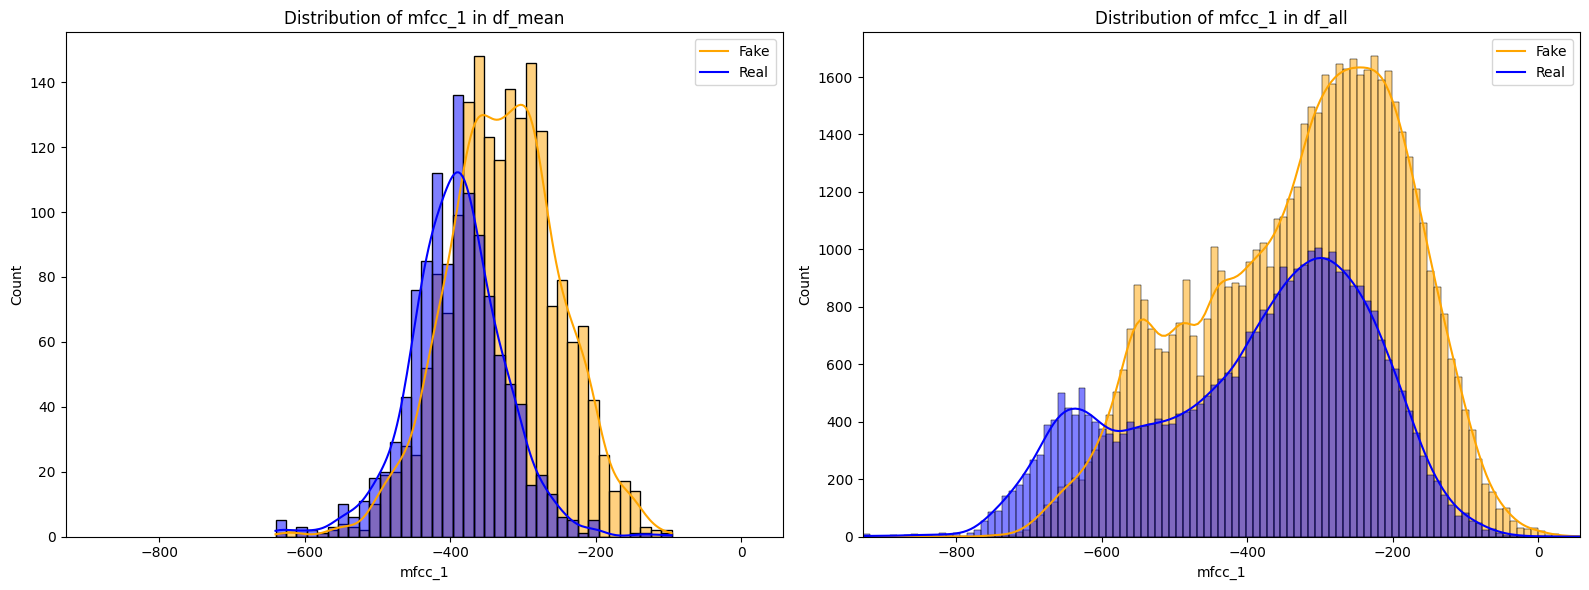

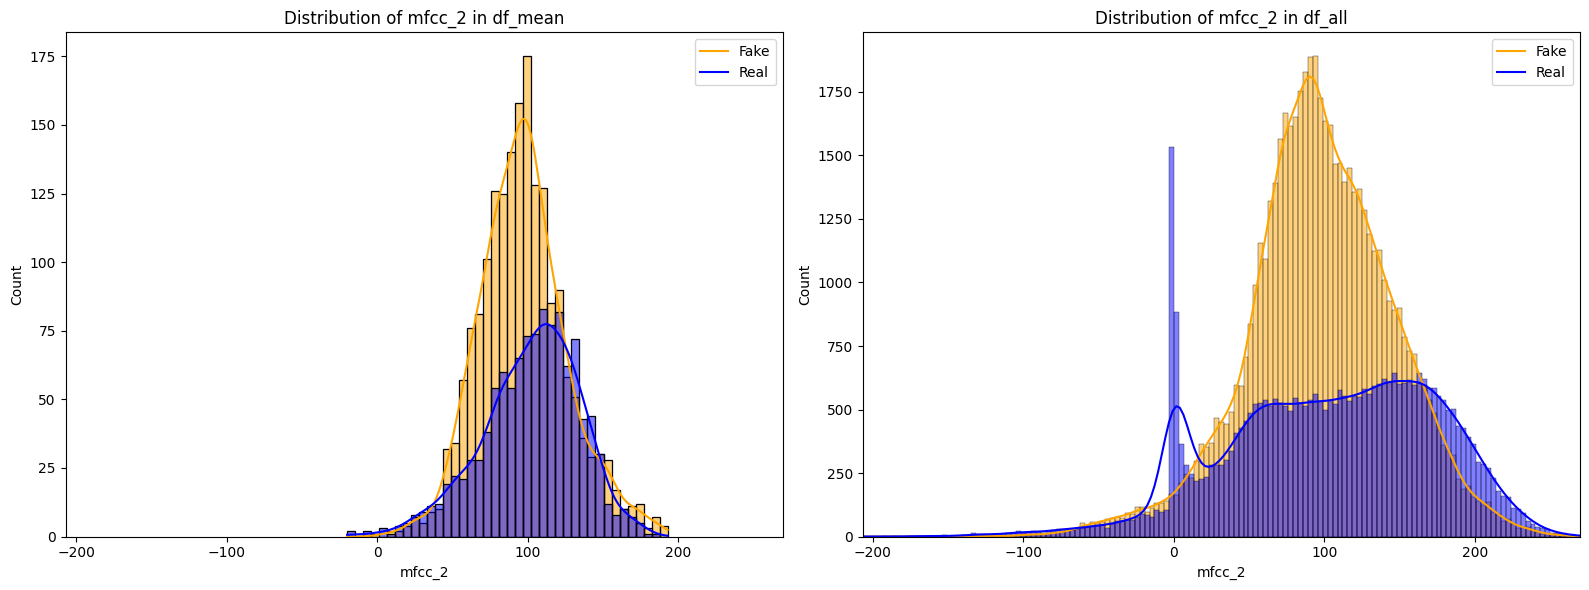

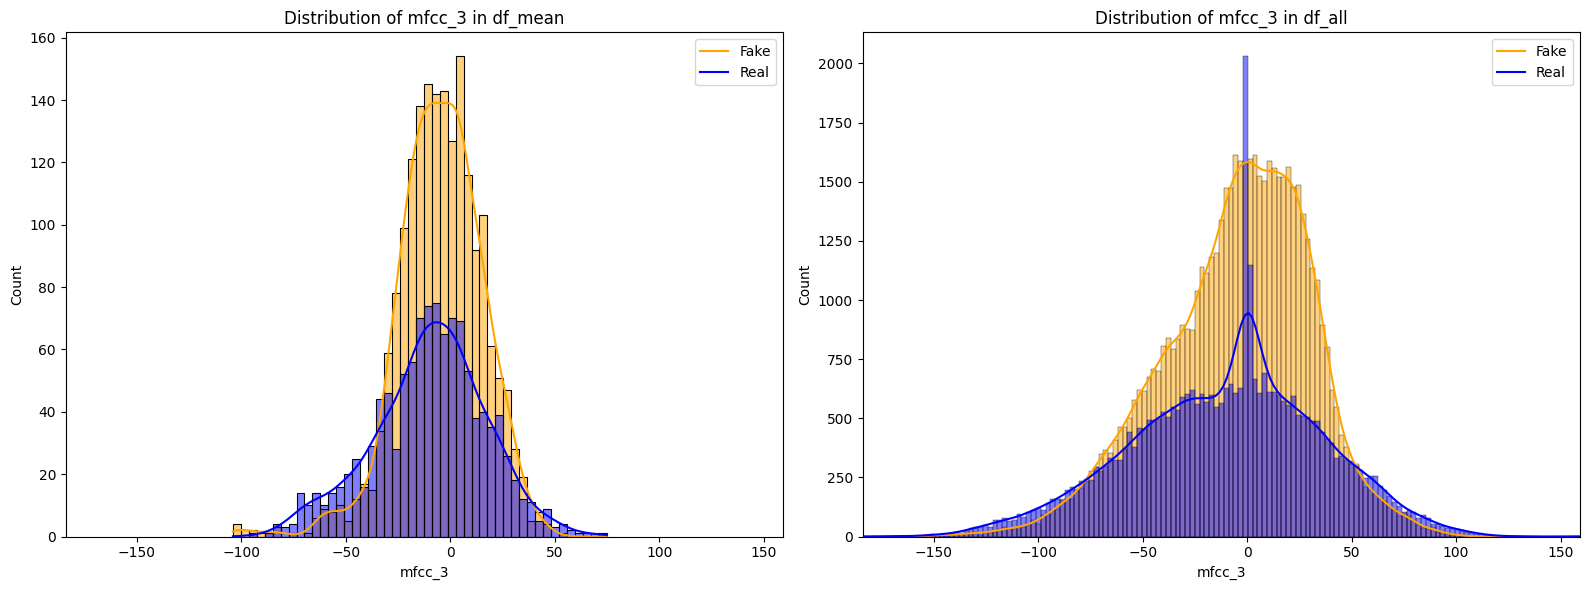

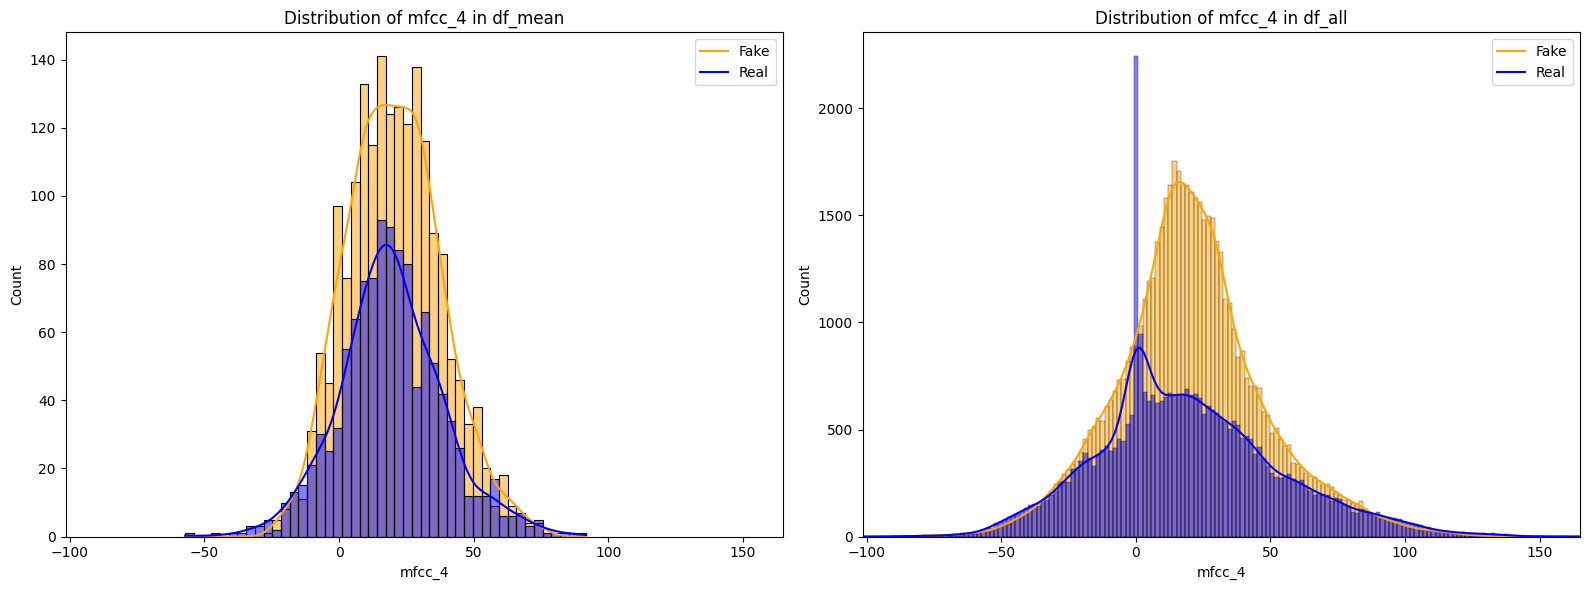

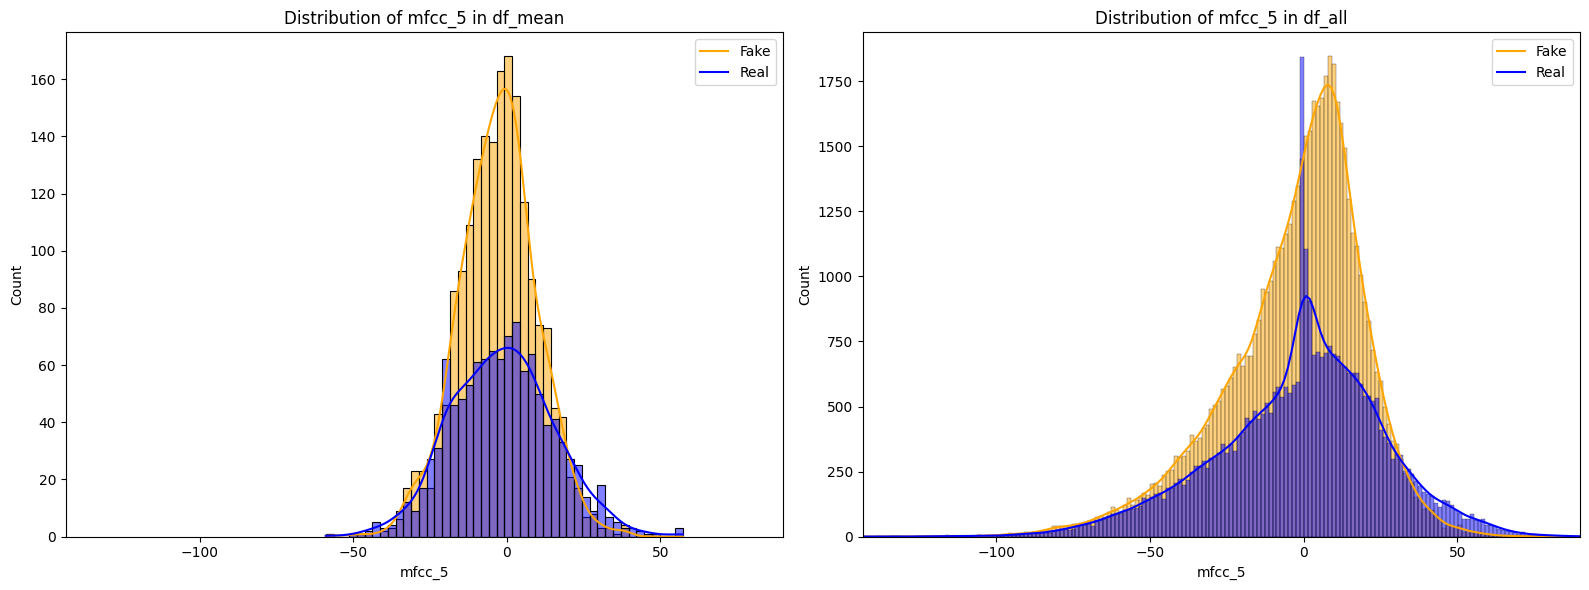

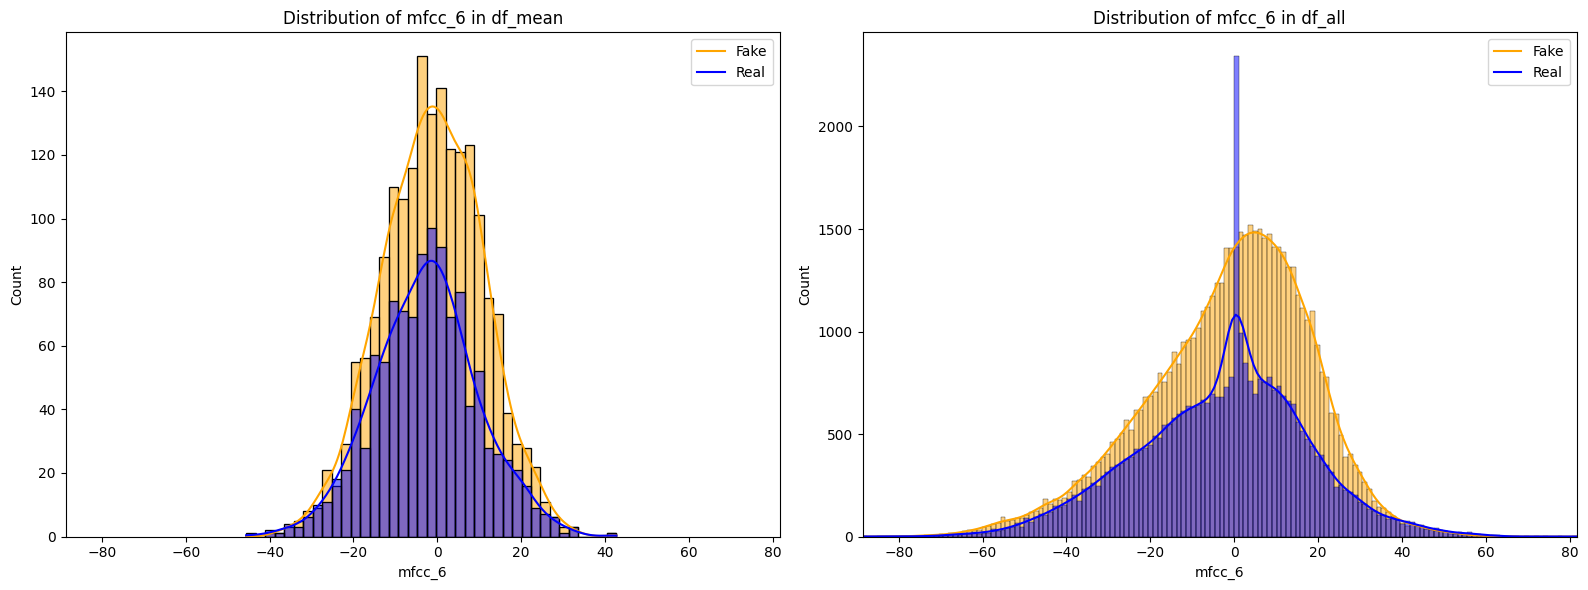

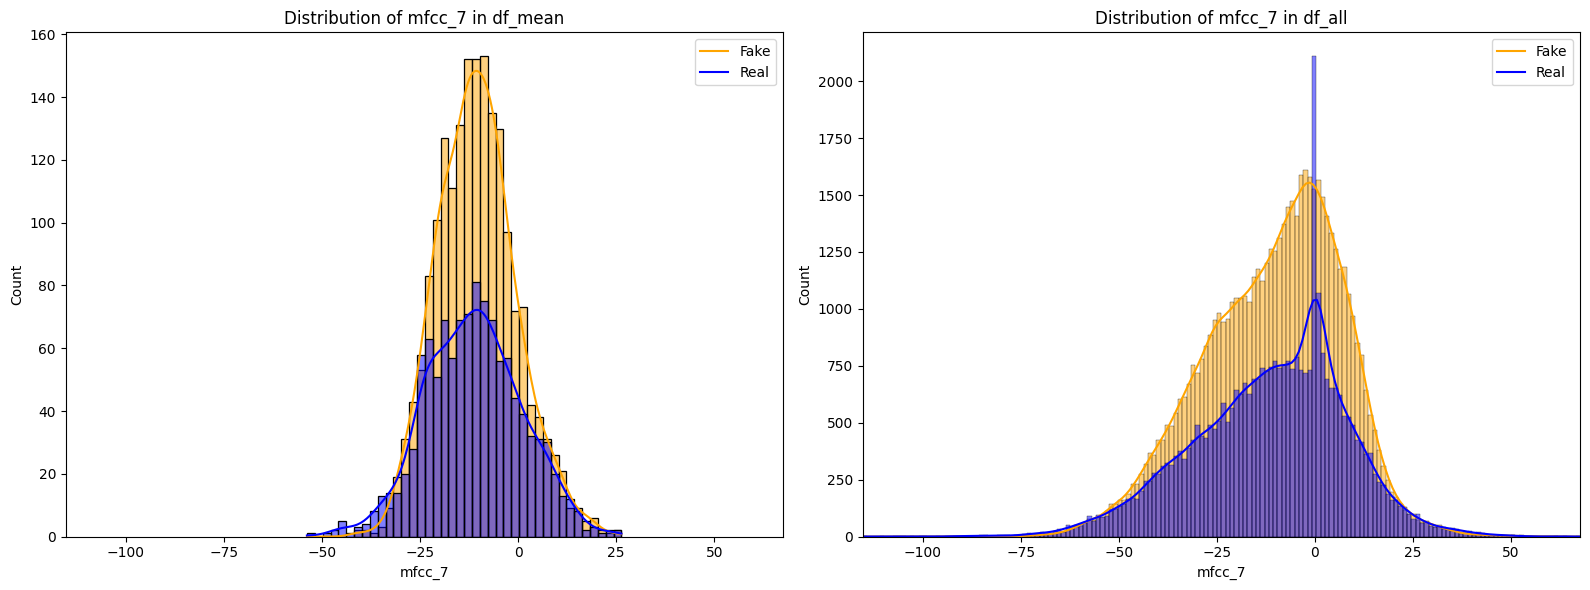

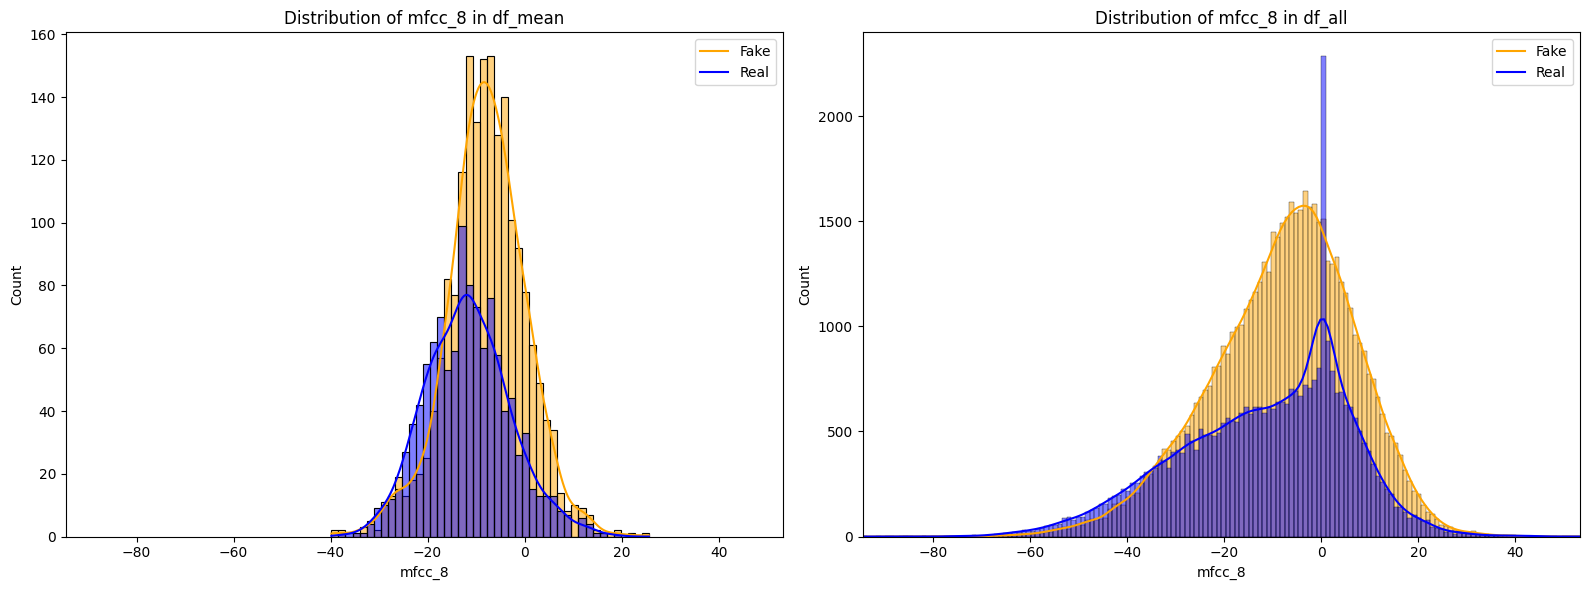

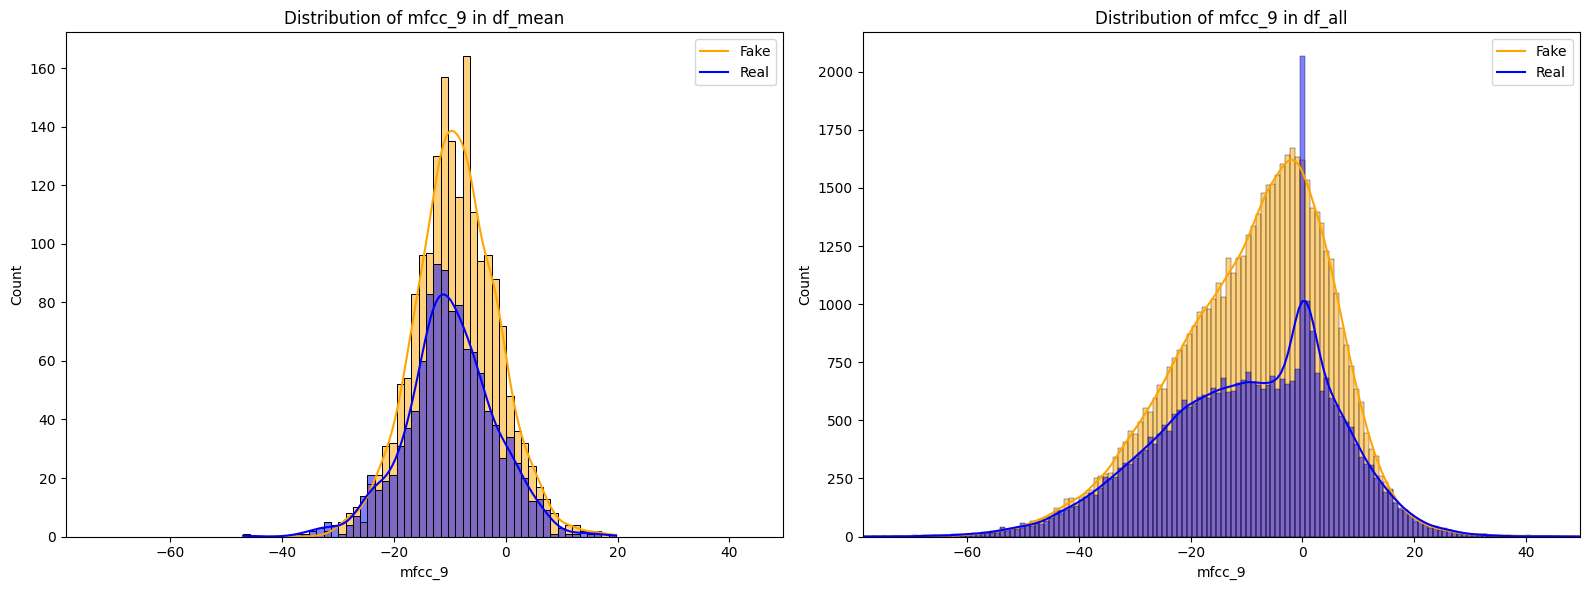

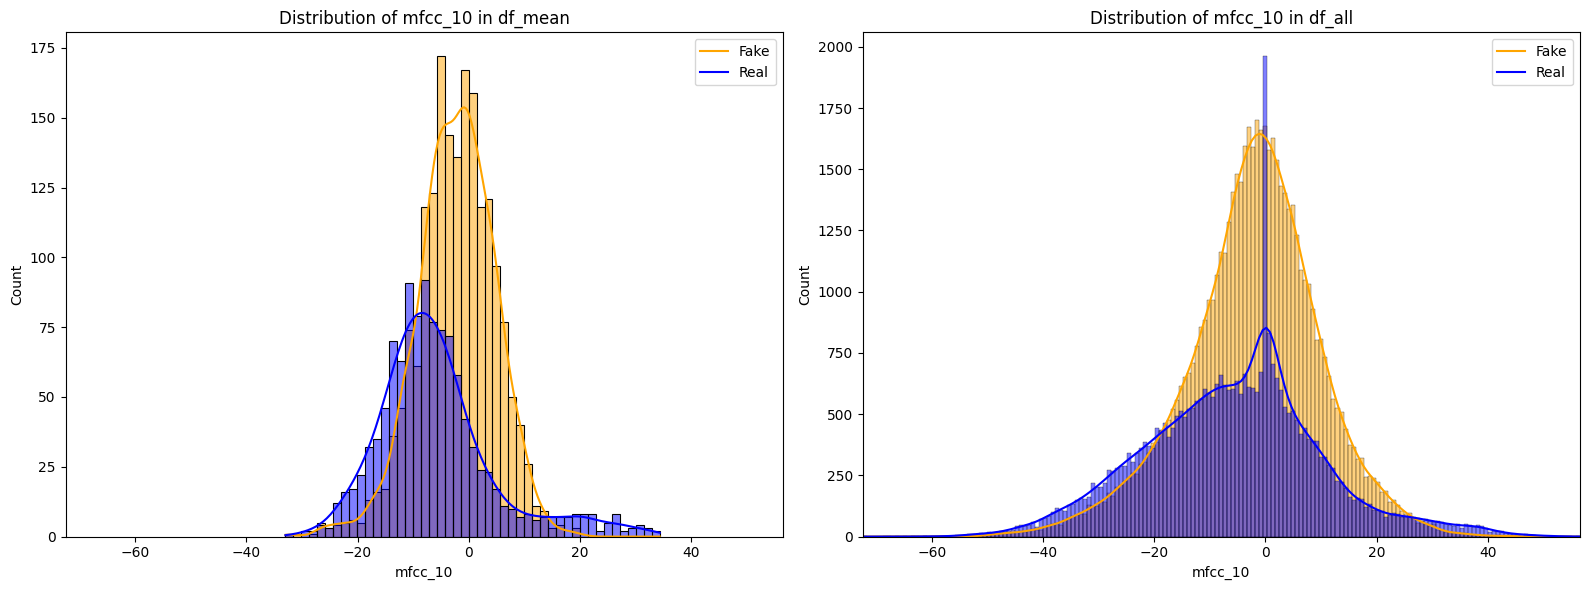

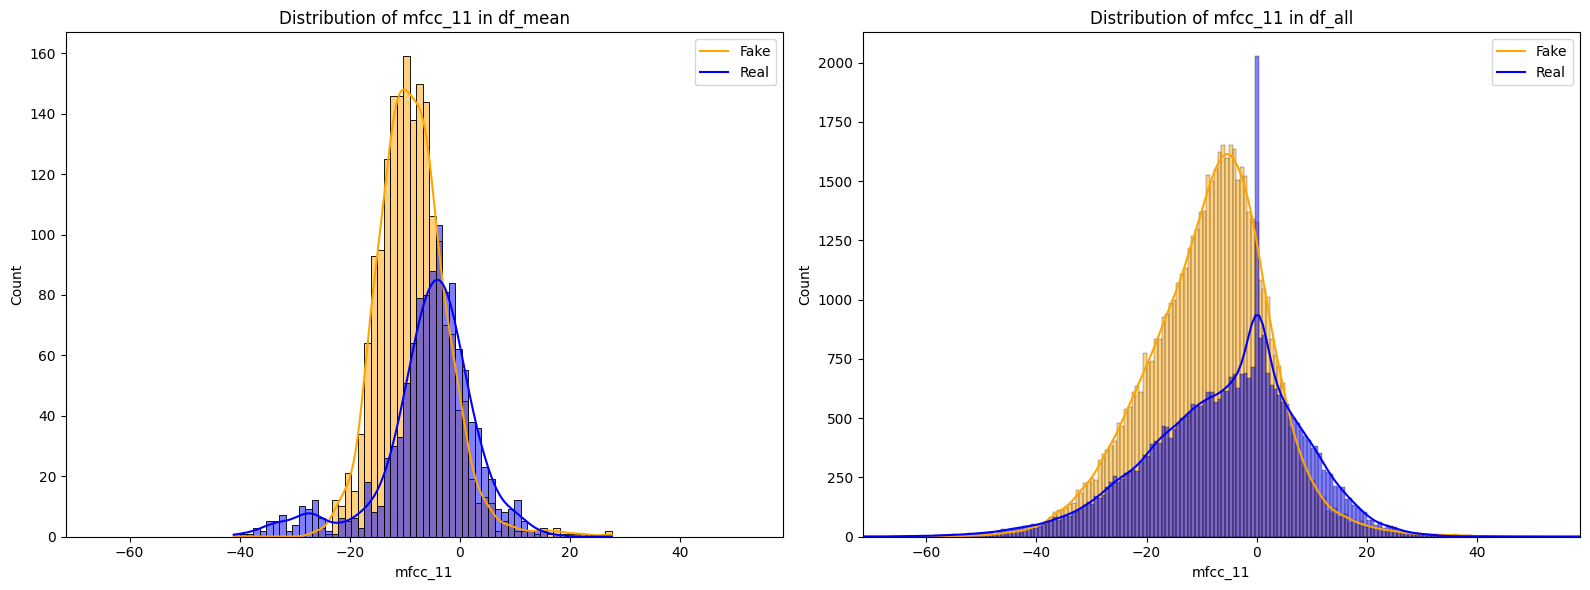

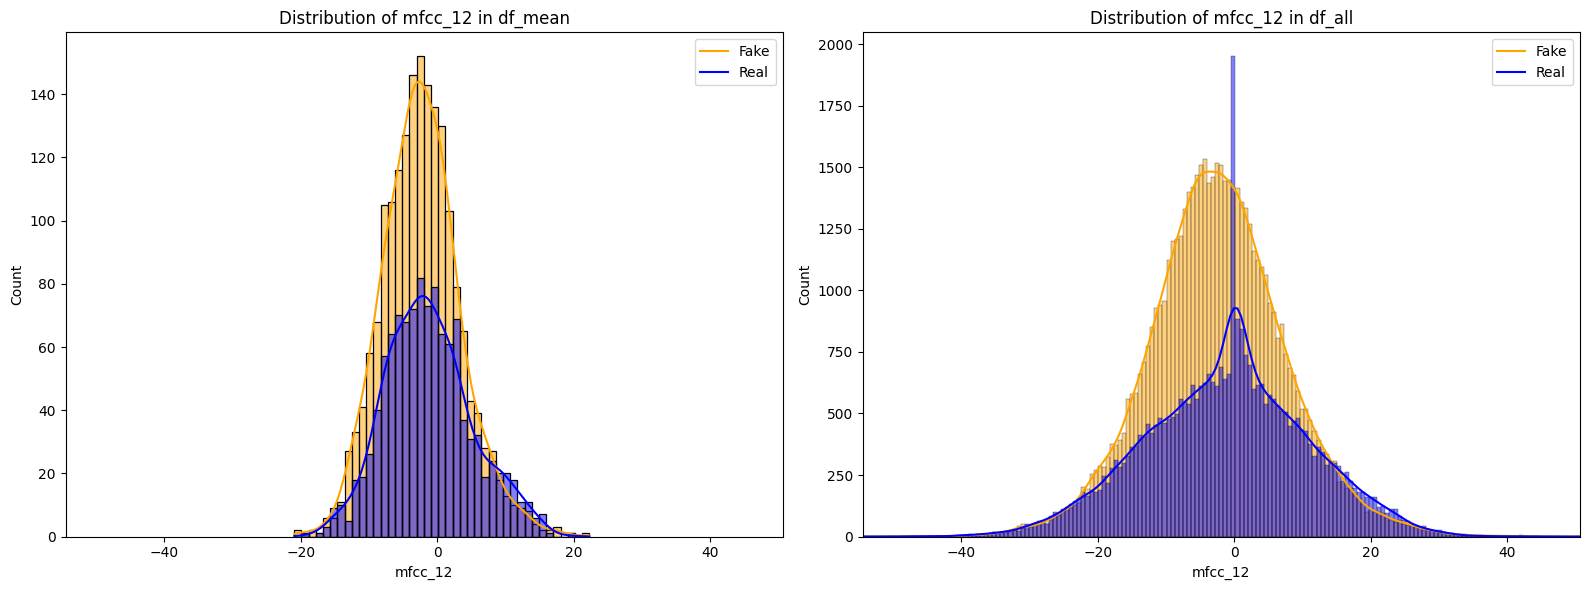

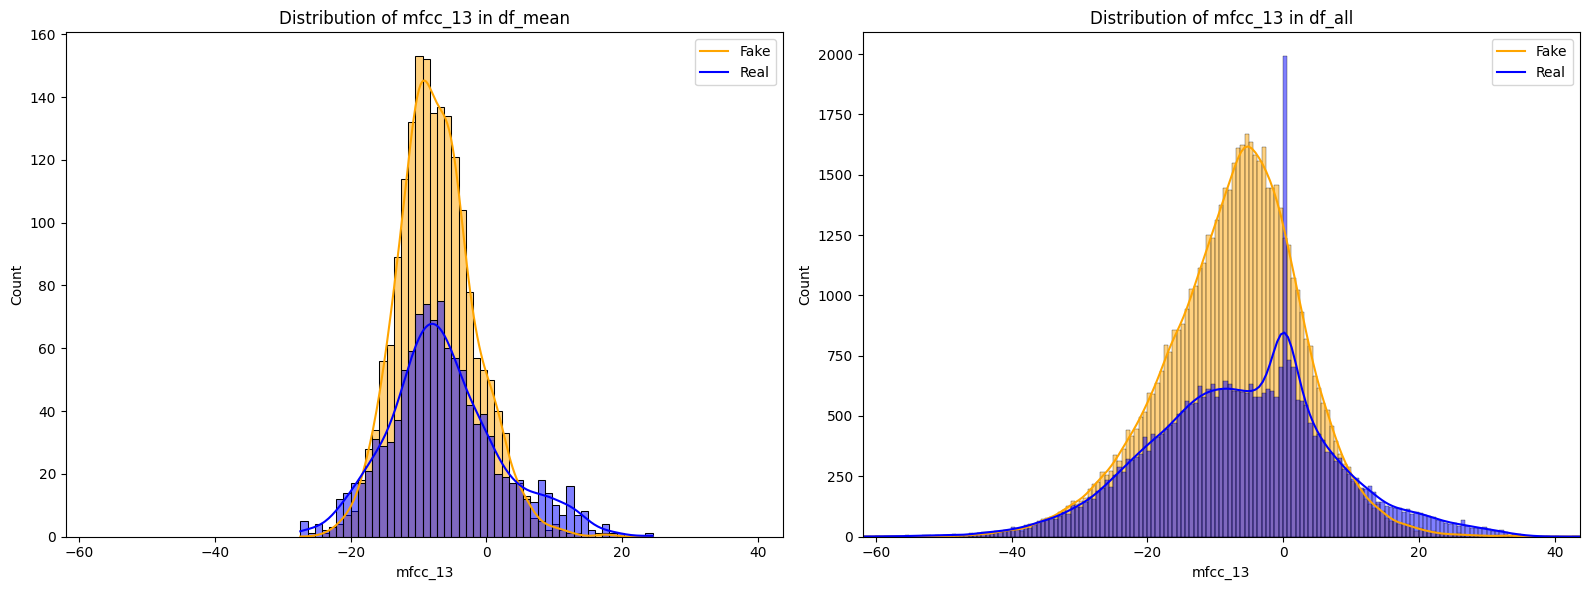

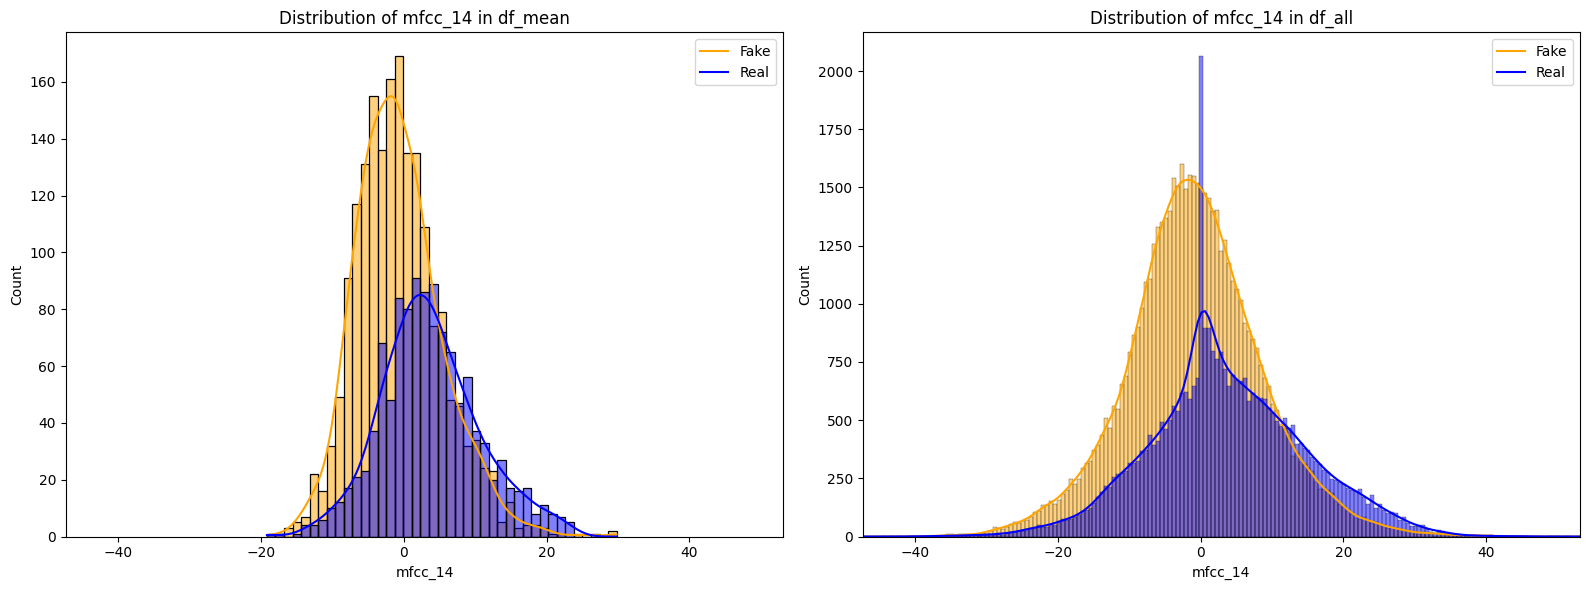

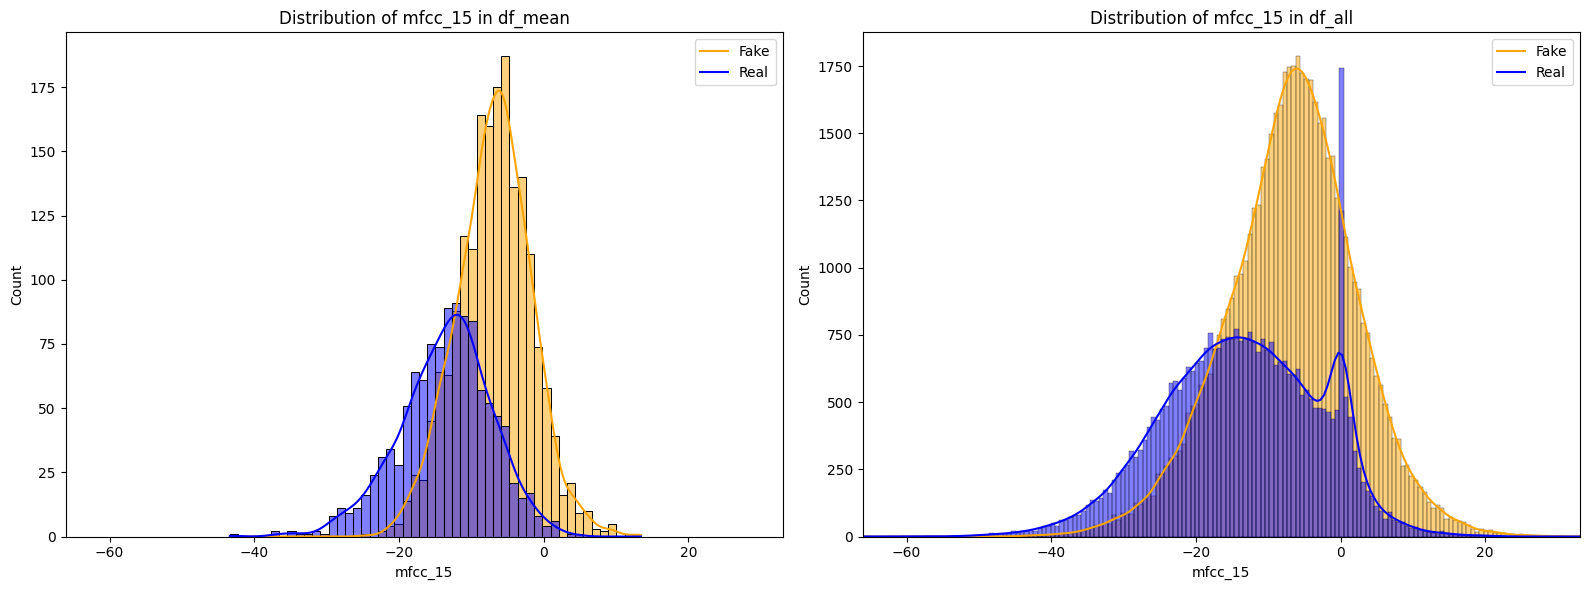

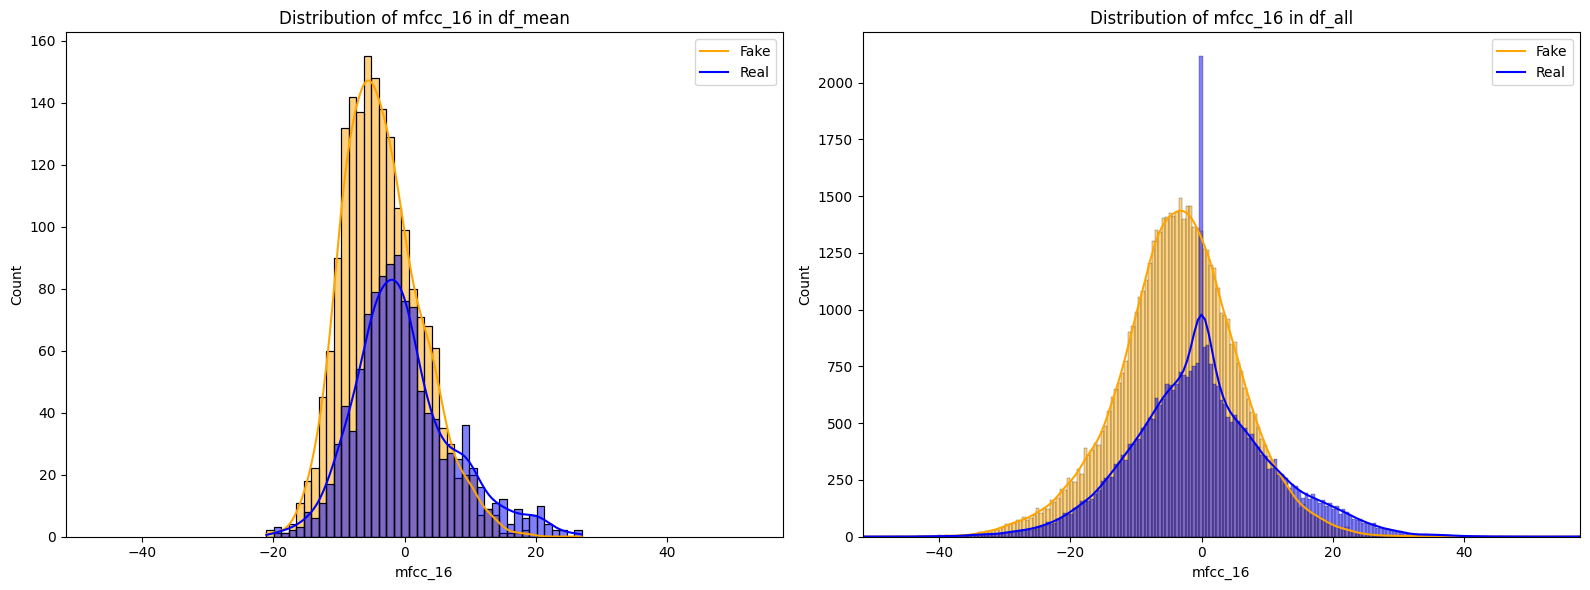

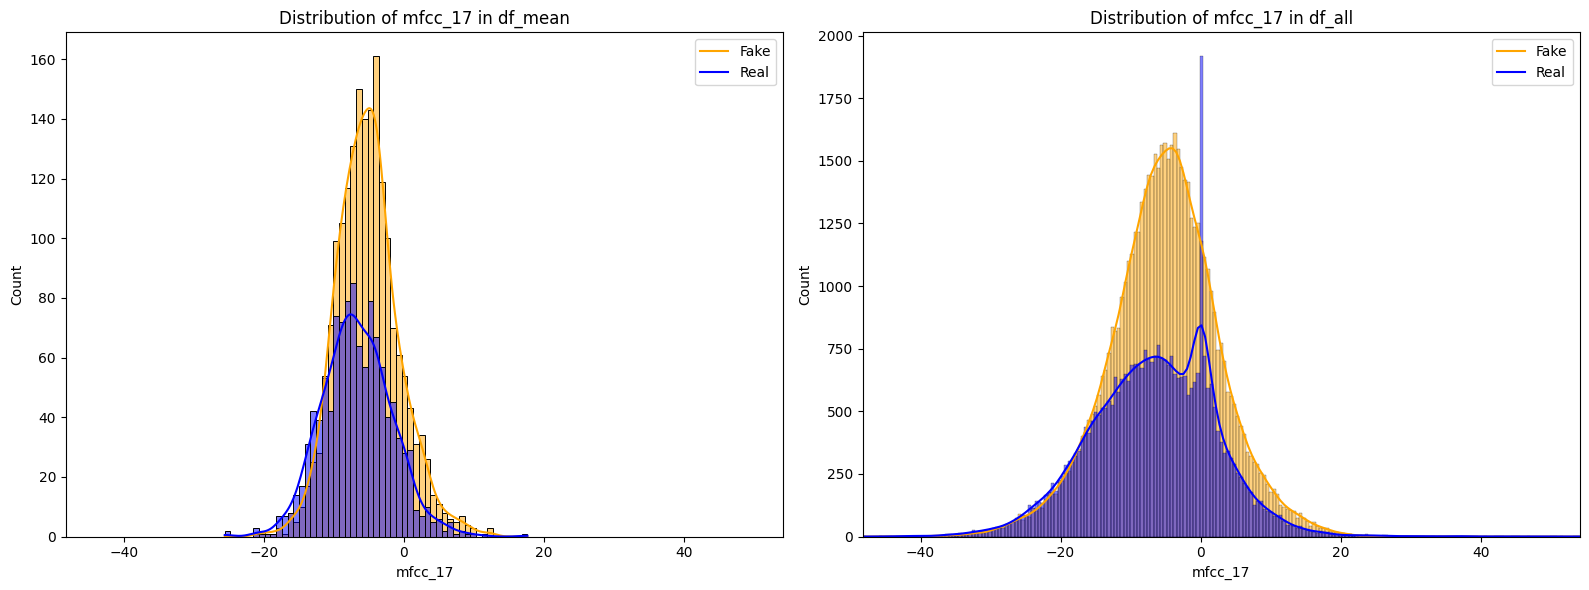

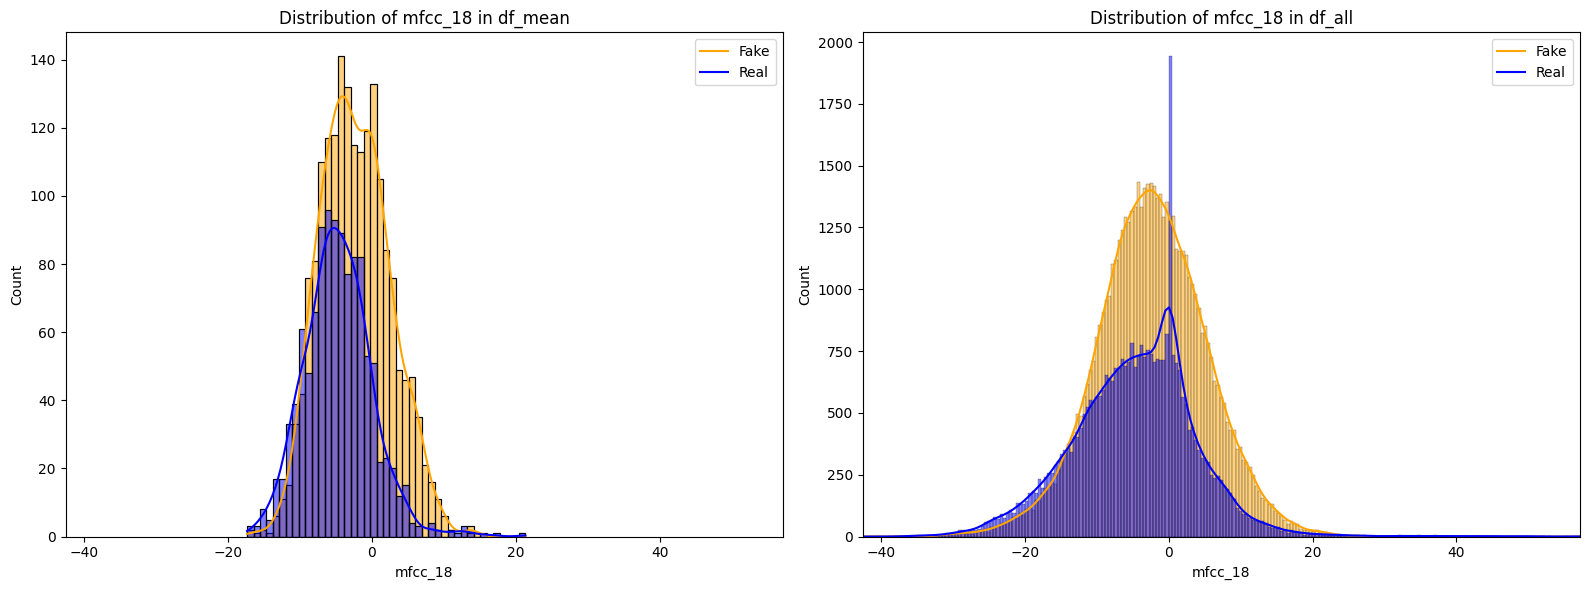

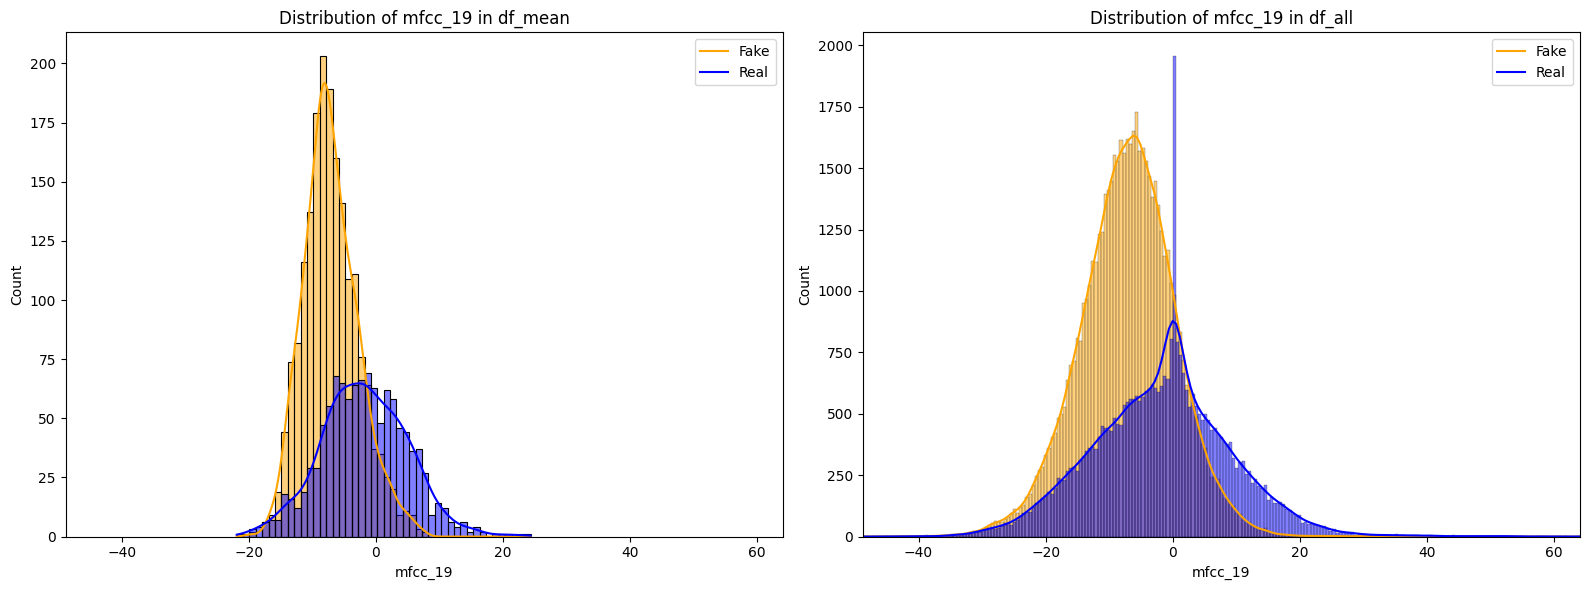

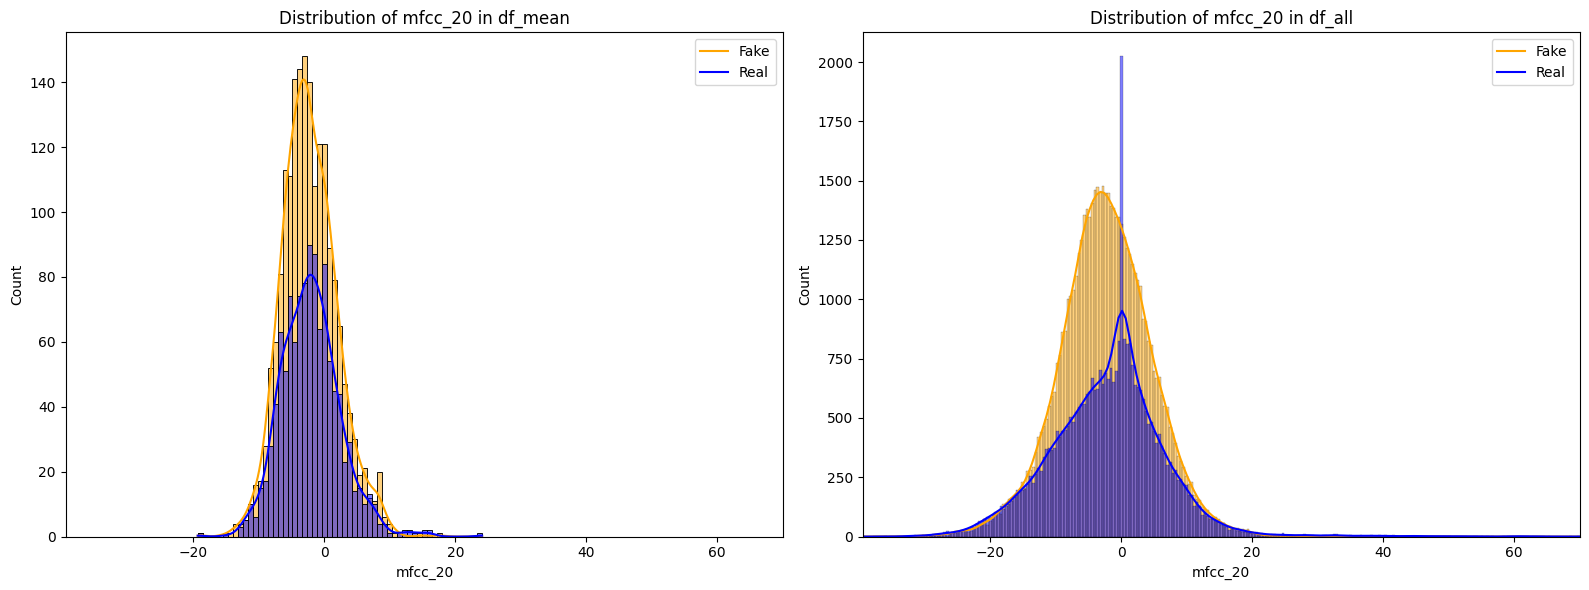

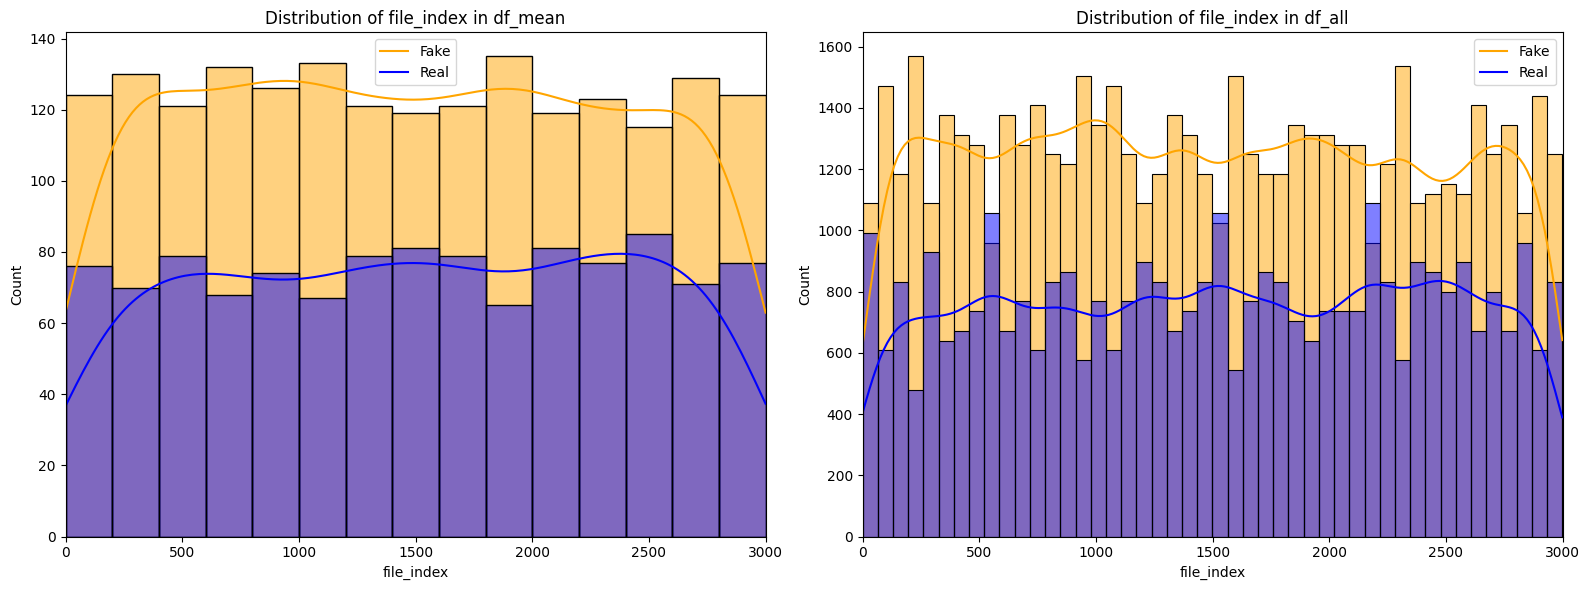

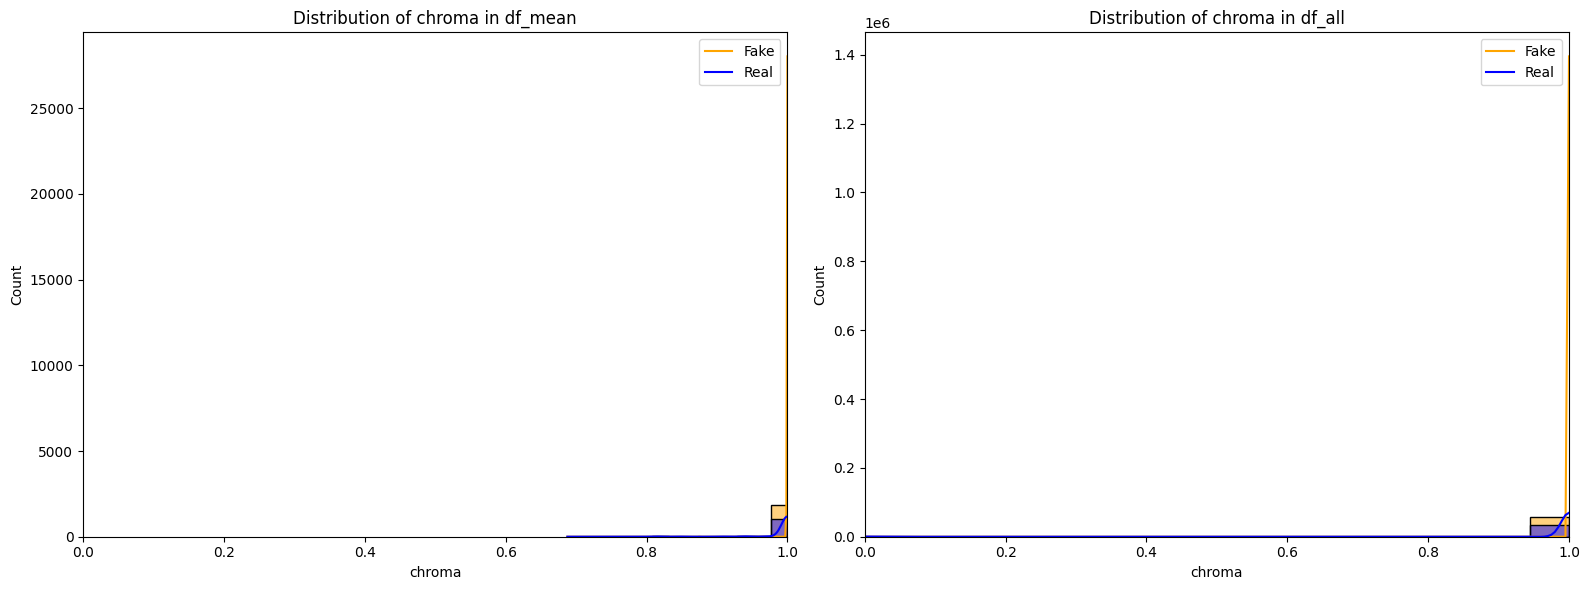

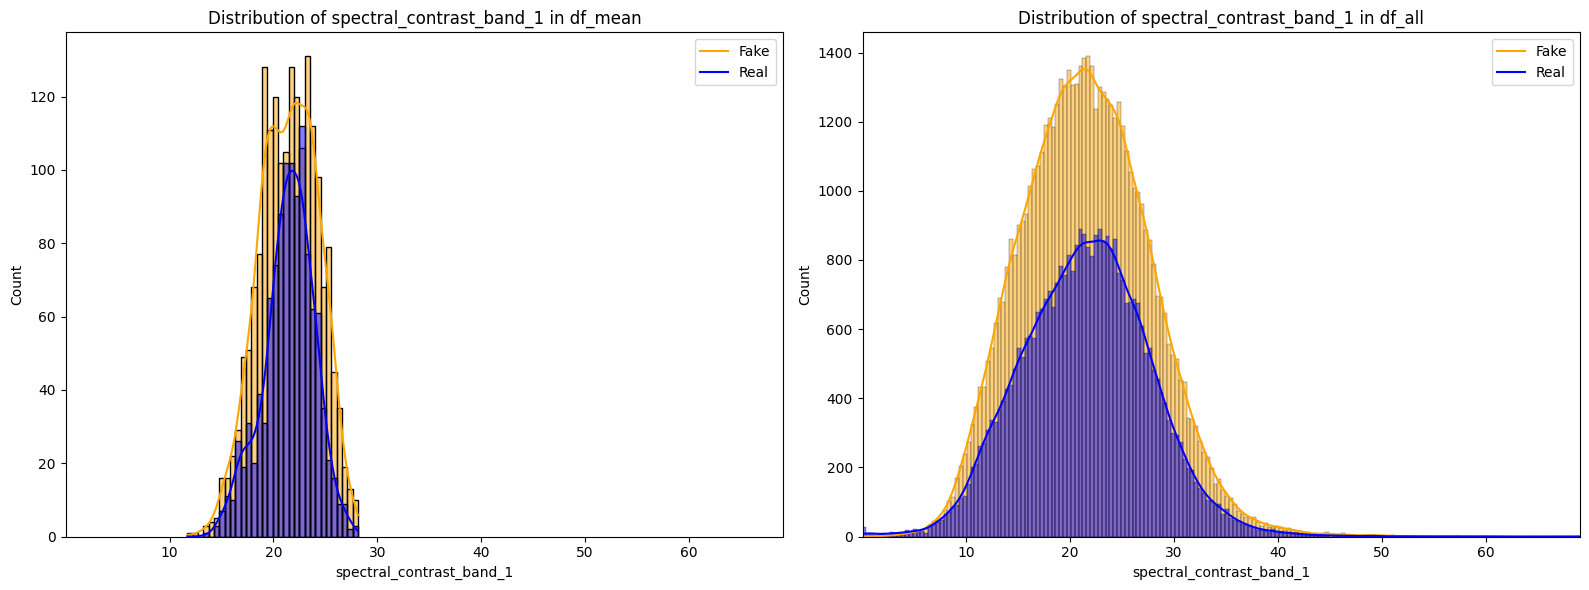

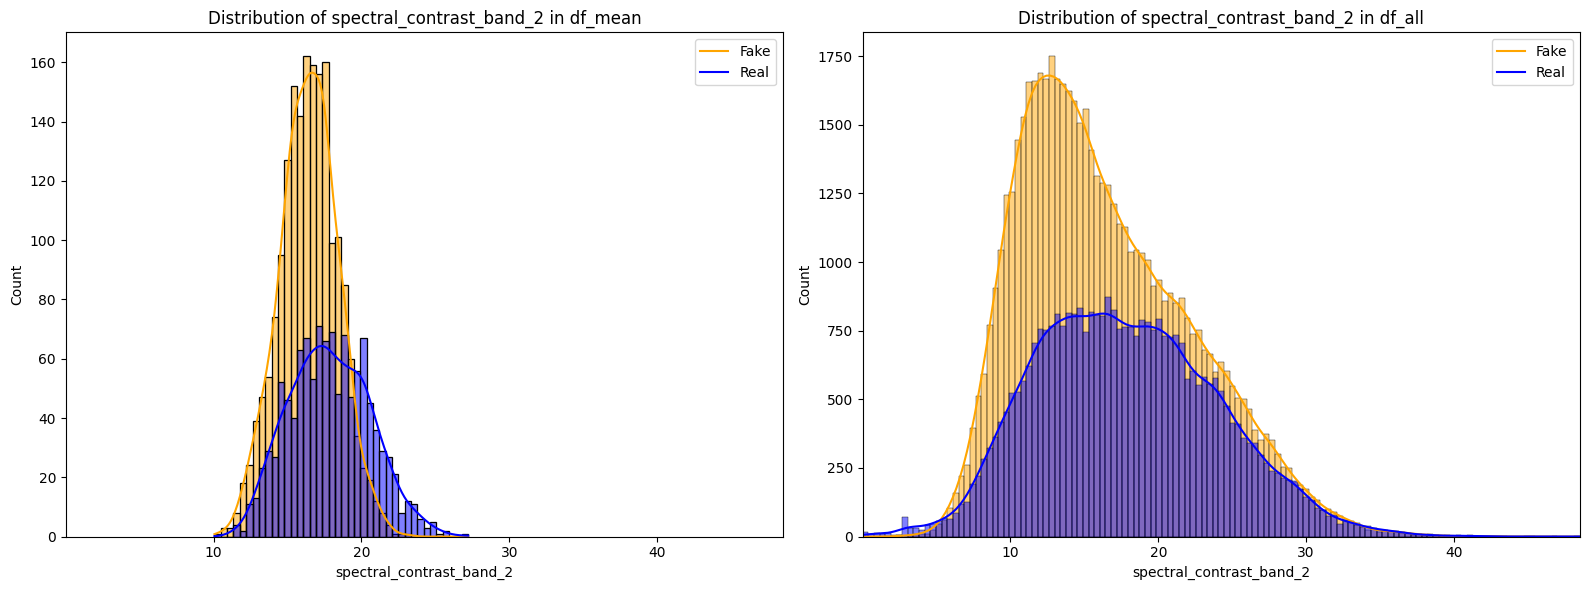

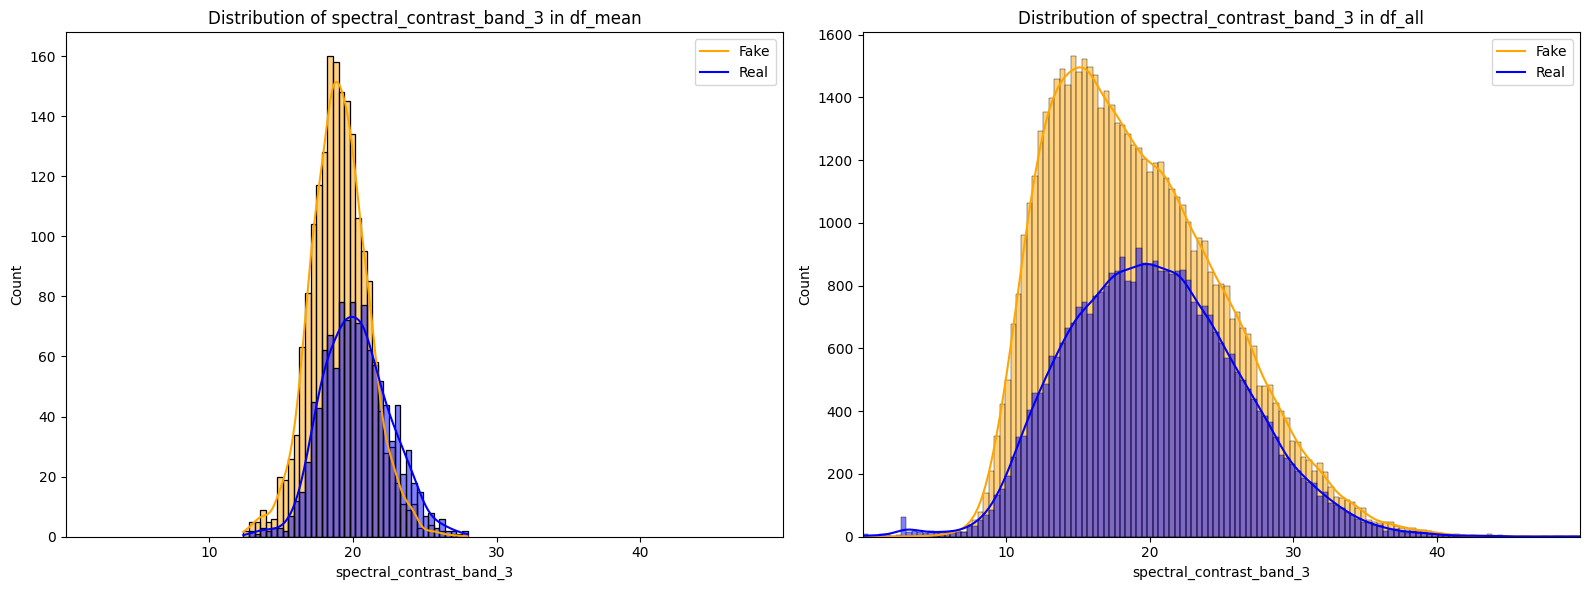

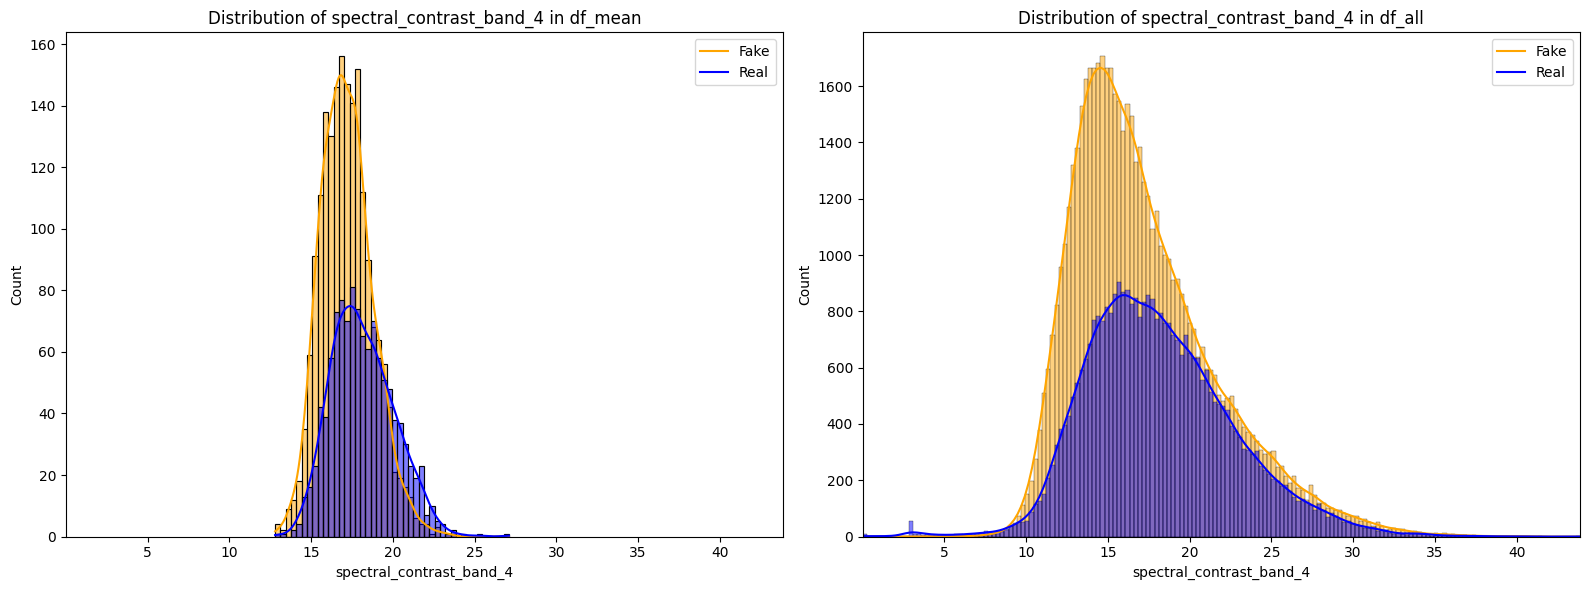

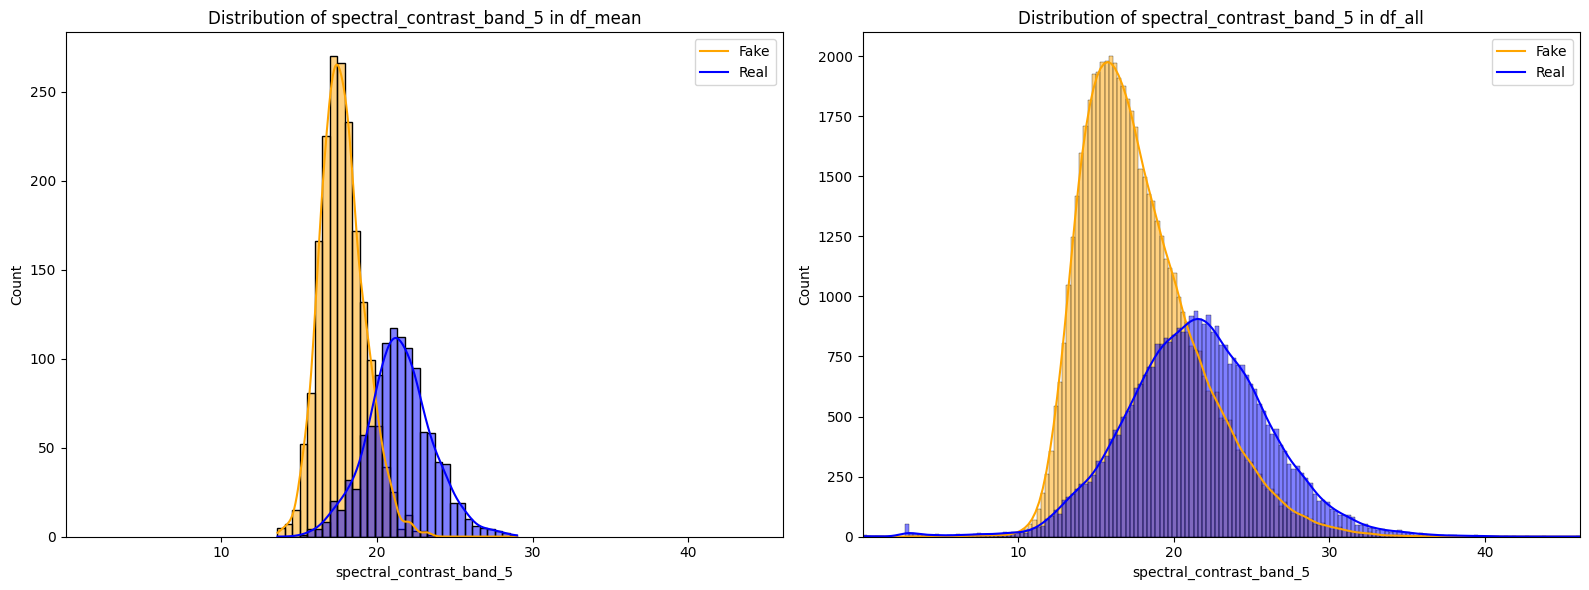

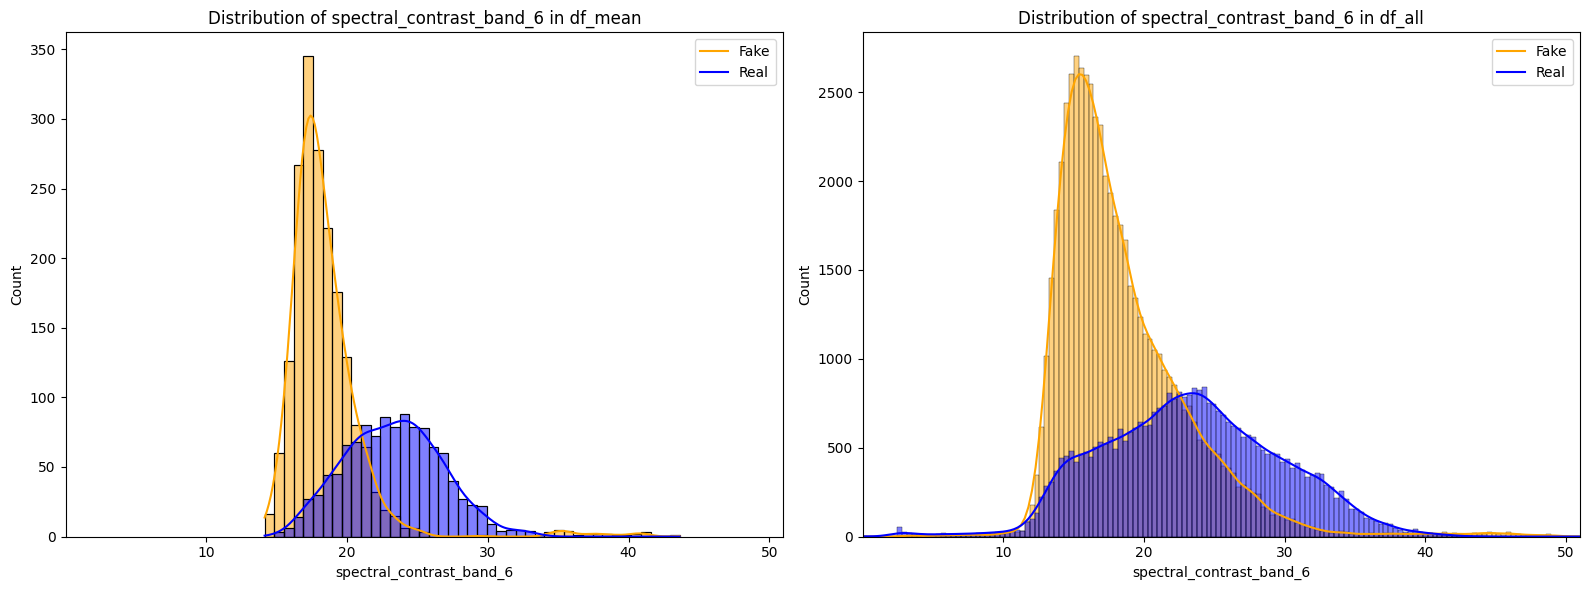

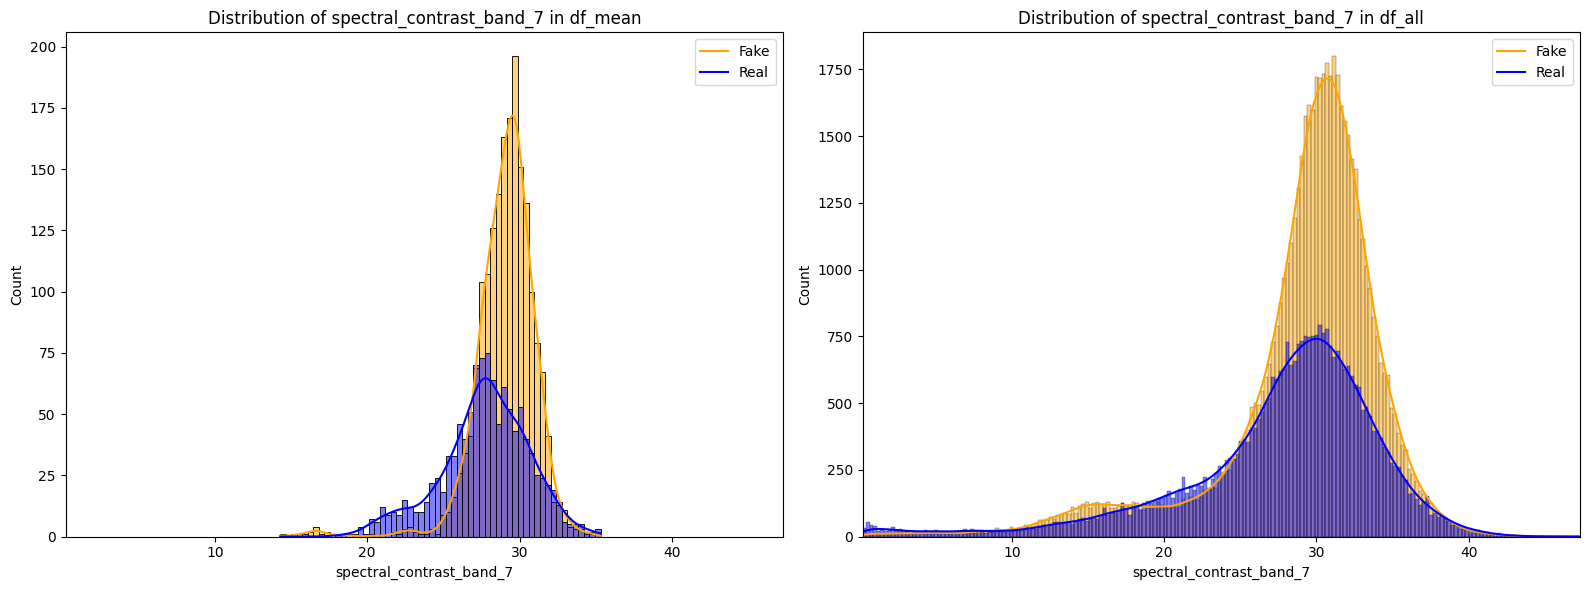

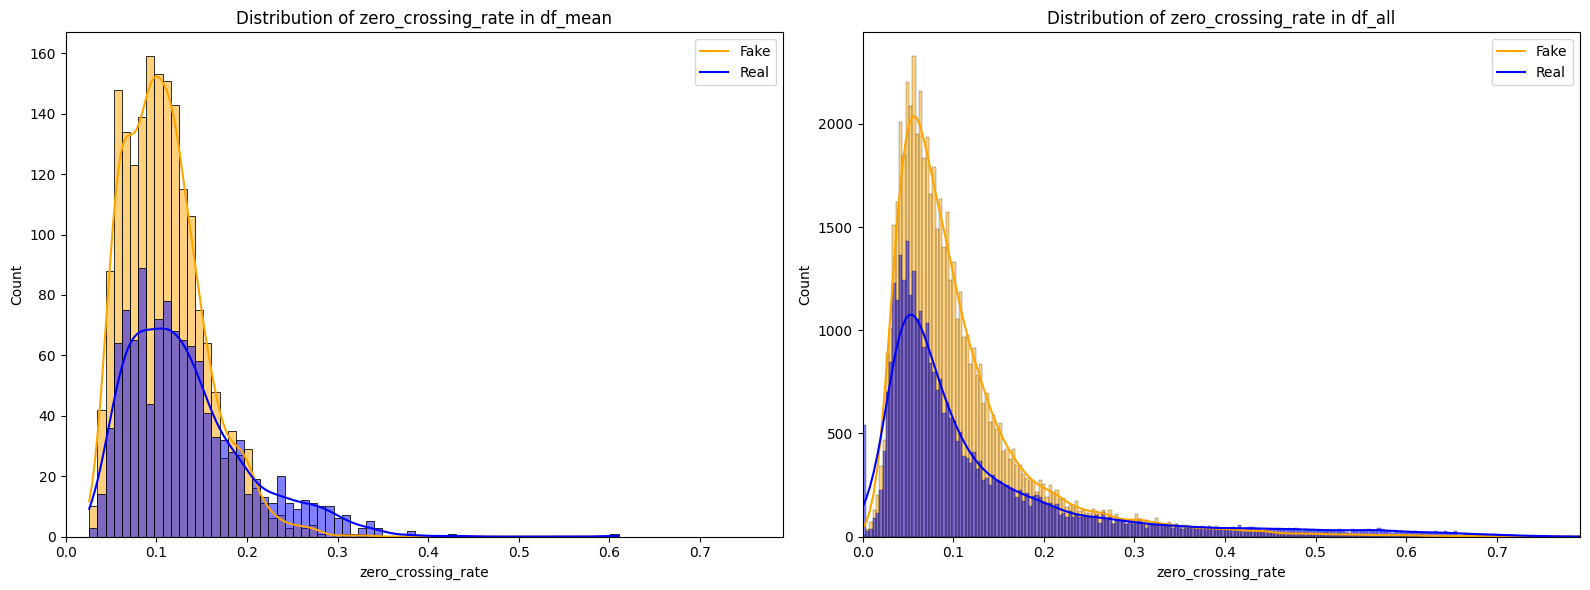

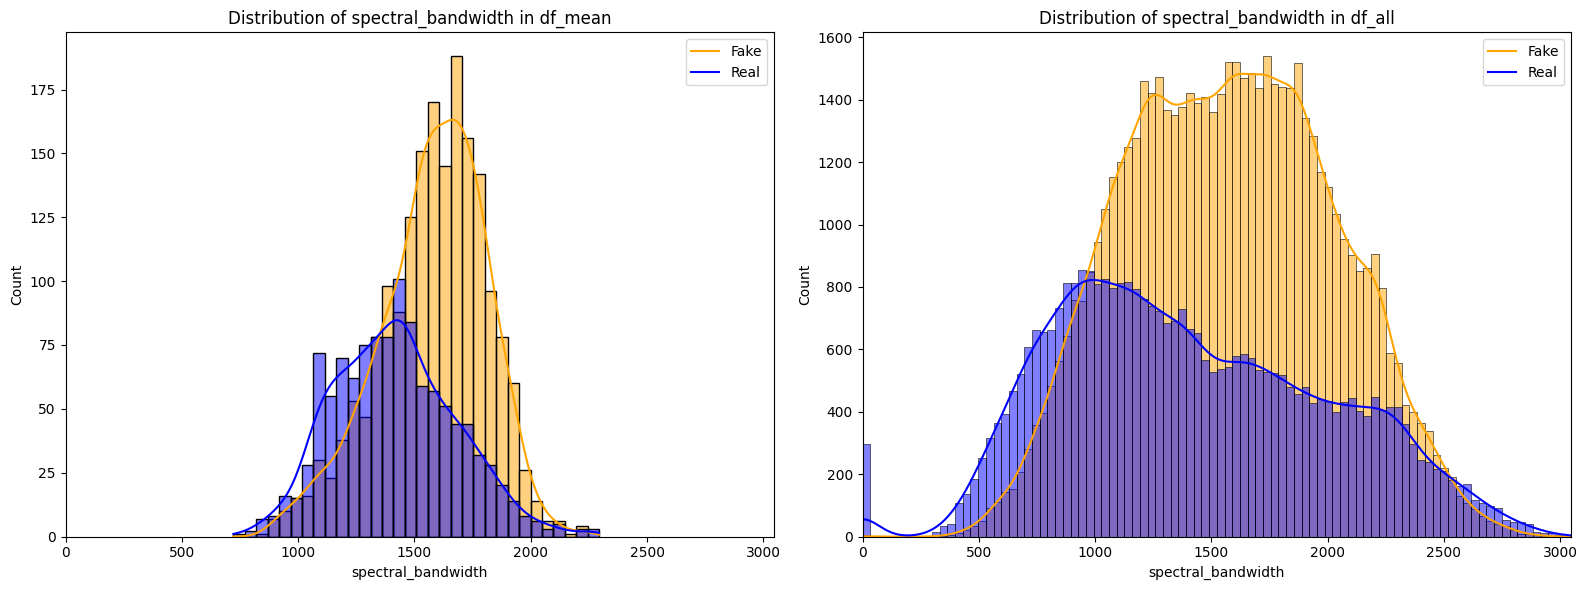

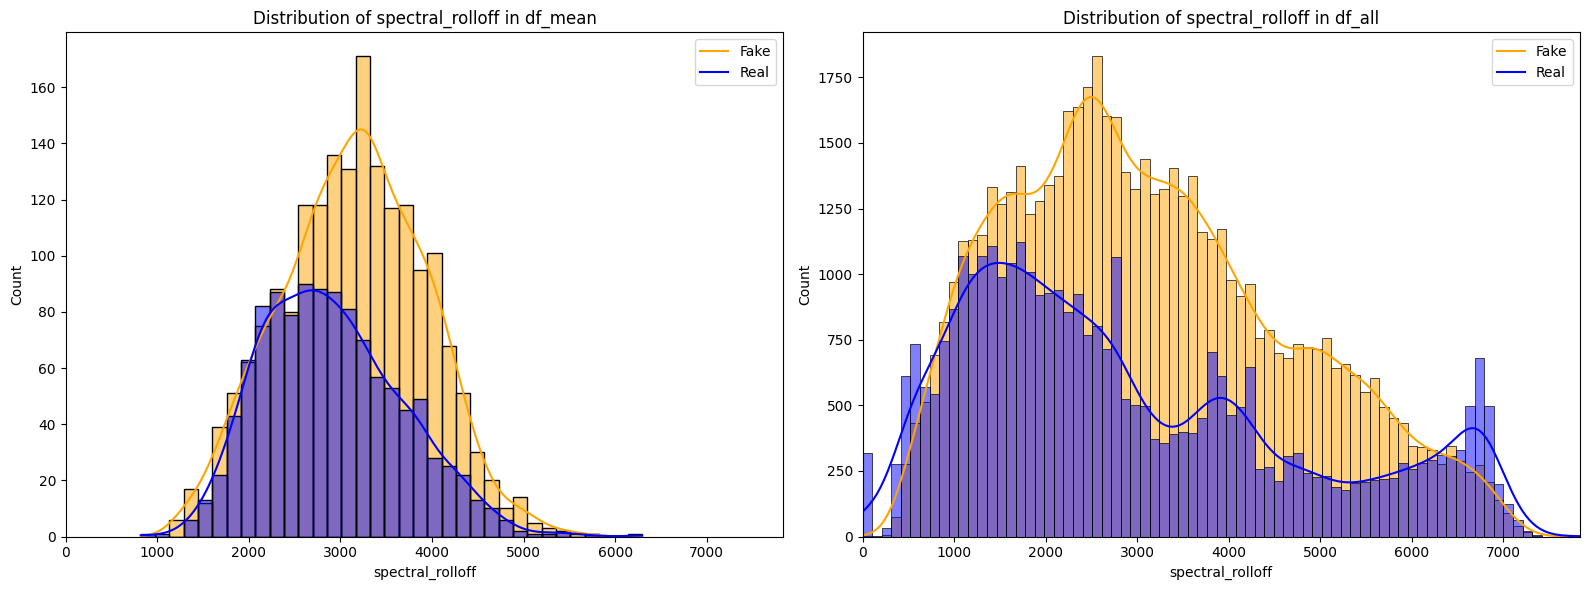

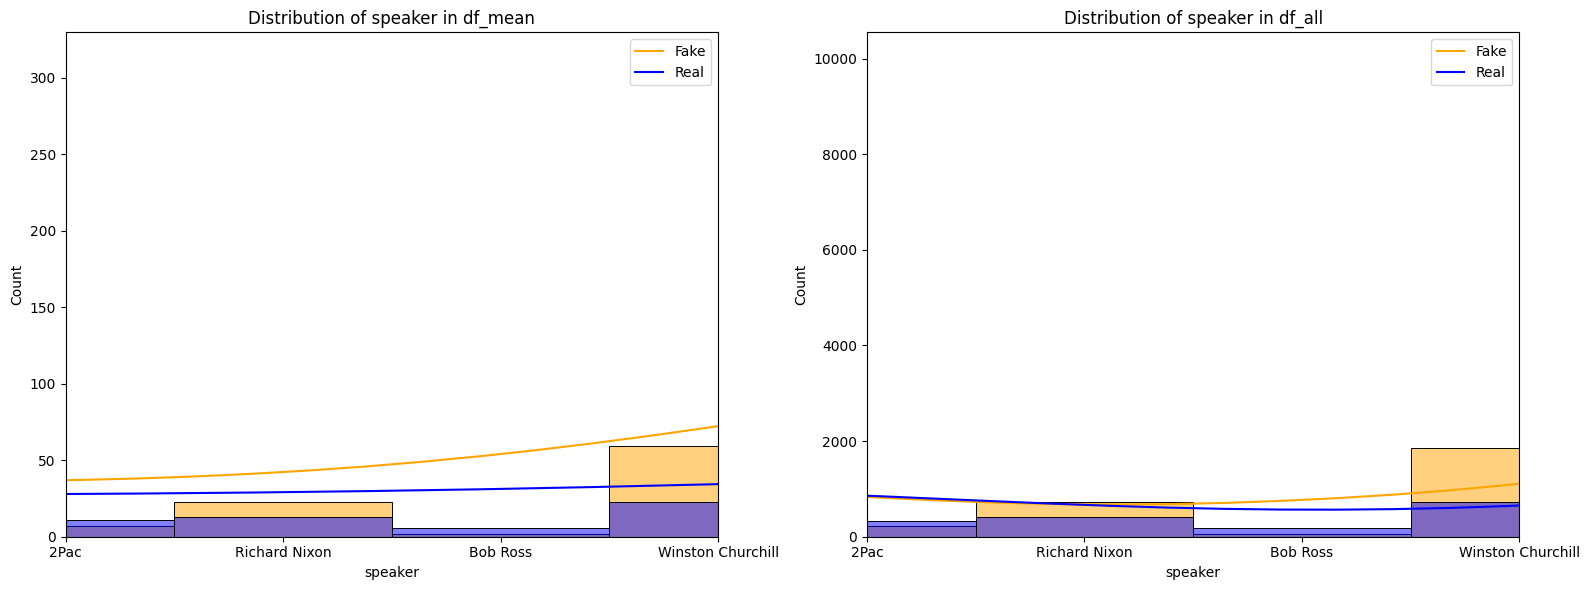

In [36]:
for column in X_mean:
    # Calculate the global x-axis range
    min_value = min(df_mean[column].min(), df_all[column].min())
    max_value = max(df_mean[column].max(), df_all[column].max())

    plt.figure(figsize=(16, 6))  # Larger figure for side-by-side comparison

    # Subplot 1: Distribution from df_mean
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_mean, x=column, hue='label', kde=True, palette=['blue', 'orange'])
    plt.title(f'Distribution of {column} in df_mean')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(labels=['Fake', 'Real'])
    plt.xlim(min_value, max_value)  # Set x-axis range

    # Subplot 2: Distribution from df_all
    plt.subplot(1, 2, 2)
    sns.histplot(data=df_all, x=column, hue='label', kde=True, palette=['blue', 'orange'])
    plt.title(f'Distribution of {column} in df_all')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(labels=['Fake', 'Real'])
    plt.xlim(min_value, max_value)  # Set x-axis range

    # Show the comparison
    plt.tight_layout()
    plt.show()

In [41]:
df_all['mfcc_3'].value_counts()

mfcc_3
 0.000000     1153
 9.864100        2
 17.296589       2
-7.449236        2
-11.153776       2
              ... 
 18.238331       1
-0.893291        1
 0.410241        1
-3.285078        1
-22.676888       1
Name: count, Length: 92452, dtype: int64

In [42]:
df_mean['mfcc_3'].value_counts()

mfcc_3
 31.964193    1
-7.109730     1
-6.655354     1
 21.667217    1
-4.999957     1
             ..
-0.581619     1
-23.820604    1
-16.686239    1
-50.331680    1
-5.262864     1
Name: count, Length: 3001, dtype: int64

In [46]:
filtered_df_all = df_all[df_all['label'] == 'spoof']
filtered_df_all['mfcc_3'].value_counts()

mfcc_3
 0.000000     1147
 32.336823       2
-30.221071       2
 38.876106       2
 54.717606       2
              ... 
-77.106323       1
-94.969208       1
-85.769974       1
-94.959167       1
 9.573780        1
Name: count, Length: 34332, dtype: int64

In [48]:
1153-1147

6

### RNN MODEL

In [132]:
from fake_no_more.data_preprocessing import process_data

In [133]:
df=pd.read_parquet('raw_data/master_audio_df_3000_all.parquet', engine='pyarrow')

In [134]:
X_train_scaled, X_test_scaled, X_val_scaled, y_train, y_test, y_val=process_data(df)

In [135]:
columns  = ['mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
       'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18', 'mfcc_19',
       'mfcc_20', 'chroma', 'spectral_contrast_band_1',
       'spectral_contrast_band_2', 'spectral_contrast_band_3',
       'spectral_contrast_band_4', 'spectral_contrast_band_5',
       'spectral_contrast_band_6', 'spectral_contrast_band_7',
       'zero_crossing_rate', 'spectral_bandwidth', 'spectral_rolloff']

In [136]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns)
X_train_scaled_df

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,spectral_contrast_band_1,spectral_contrast_band_2,spectral_contrast_band_3,spectral_contrast_band_4,spectral_contrast_band_5,spectral_contrast_band_6,spectral_contrast_band_7,zero_crossing_rate,spectral_bandwidth,spectral_rolloff
0,0.577875,0.635772,0.682430,0.562499,0.689046,0.624605,0.671281,0.739684,0.599366,0.612623,...,0.276453,0.272381,0.265649,0.304735,0.275906,0.262510,0.669690,0.037608,0.593413,0.381854
1,0.702150,0.645987,0.549093,0.402600,0.438239,0.625087,0.796063,0.468176,0.617253,0.438601,...,0.143297,0.578607,0.479402,0.669350,0.438151,0.560286,0.318430,0.057337,0.531383,0.463609
2,0.410899,0.702541,0.597703,0.489998,0.696058,0.409782,0.462837,0.537086,0.616192,0.399974,...,0.389741,0.447641,0.351081,0.545678,0.454340,0.391692,0.621174,0.056720,0.355180,0.223330
3,0.410142,0.668082,0.670949,0.354862,0.621087,0.591931,0.637467,0.497993,0.411785,0.435033,...,0.319816,0.374618,0.595188,0.379685,0.417236,0.346697,0.608266,0.081998,0.286095,0.114656
4,0.564594,0.763546,0.604236,0.579071,0.650601,0.672457,0.617024,0.465848,0.564294,0.380184,...,0.485558,0.228362,0.399406,0.356682,0.402405,0.446821,0.595040,0.067201,0.328817,0.132602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59939,0.699560,0.759725,0.712843,0.285164,0.612779,0.608902,0.552963,0.666767,0.375019,0.535988,...,0.386450,0.287897,0.397539,0.509086,0.582561,0.440661,0.793873,0.051171,0.540648,0.166500
59940,0.415241,0.622186,0.572129,0.413287,0.612109,0.506412,0.539604,0.691685,0.576779,0.362454,...,0.182516,0.233737,0.254593,0.464104,0.502036,0.486127,0.733126,0.217633,0.583969,0.504487
59941,0.756544,0.513180,0.748689,0.352352,0.795449,0.559428,0.602990,0.706726,0.525879,0.708118,...,0.083866,0.462244,0.244253,0.317688,0.336563,0.357403,0.459932,0.441430,0.912049,0.888335
59942,0.702489,0.665708,0.589414,0.745467,0.389706,0.480292,0.668508,0.344288,0.345949,0.592036,...,0.301893,0.506756,0.710268,0.434010,0.576815,0.589705,0.637362,0.050555,0.413679,0.363908


In [141]:
X_train_scaled.shape

(59944, 31)

In [152]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_train_reshaped.shape

(59944, 1, 31)

In [153]:
X_val_reshaped = X_val_scaled.reshape(X_val_scaled.shape[0], 1, X_val_scaled.shape[1])
X_val_reshaped.shape

(14987, 1, 31)

In [157]:
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
X_test_reshaped.shape

(18733, 1, 31)

In [154]:
def initialize_model_RNN():

    model_RNN = Sequential()
    model_RNN.add(Input(shape=(1,31)))

    # First LSTM layer
    model_RNN.add(LSTM(64, return_sequences=True))
    model_RNN.add(Dropout(0.2))

    # Second LSTM layer
    model_RNN.add(LSTM(64, return_sequences=True))
    model_RNN.add(Dropout(0.2))

    # Third LSTM layer
    model_RNN.add(LSTM(64, return_sequences=True))
    model_RNN.add(Dropout(0.2))

    # Fourth LSTM layer
    model_RNN.add(LSTM(64, return_sequences=False))
    model_RNN.add(Dropout(0.2))

    # First Dense layer
    model_RNN.add(Dense(64, activation='relu'))
    model_RNN.add(Dropout(0.2))

    # Second Dense layer
    model_RNN.add(Dense(32, activation='relu'))
    model_RNN.add(Dropout(0.2))

    # Output layer
    model_RNN.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.001)
    model_RNN.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])
    return model_RNN

In [156]:
callback = EarlyStopping(patience= 5, restore_best_weights = True)
model = initialize_model_RNN()
history = model.fit(X_train_reshaped, y_train, epochs=50, validation_data=(X_val_reshaped, y_val))
history

Epoch 1/50
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.7658 - loss: 0.4926 - val_accuracy: 0.8421 - val_loss: 0.3756
Epoch 2/50
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8499 - loss: 0.3638 - val_accuracy: 0.8490 - val_loss: 0.3445
Epoch 3/50
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8492 - loss: 0.3501 - val_accuracy: 0.8627 - val_loss: 0.3122
Epoch 4/50
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8617 - loss: 0.3211 - val_accuracy: 0.8555 - val_loss: 0.3279
Epoch 5/50
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8678 - loss: 0.3100 - val_accuracy: 0.8801 - val_loss: 0.2817
Epoch 6/50
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8769 - loss: 0.2946 - val_accuracy: 0.8760 - val_loss: 0.2889
Epoch 7/50
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8808 - loss: 0.2841 - val_accuracy: 0.8815 - val_loss: 0.2758
Epoch 8/50
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8842 -

1874/1874 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9240 - loss: 0.1921 - val_accuracy: 0.9253 - val_loss: 0.1818


In [170]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(loss)

586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9303 - loss: 0.1761
0.1692192554473877


In [165]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))

    # --- LOSS --- 

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    ax[0].set_ylim((0,3))

    ax[0].legend(['Train', 'Test'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'Test'], loc='best')

    ax[1].set_ylim((0,1))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)
        

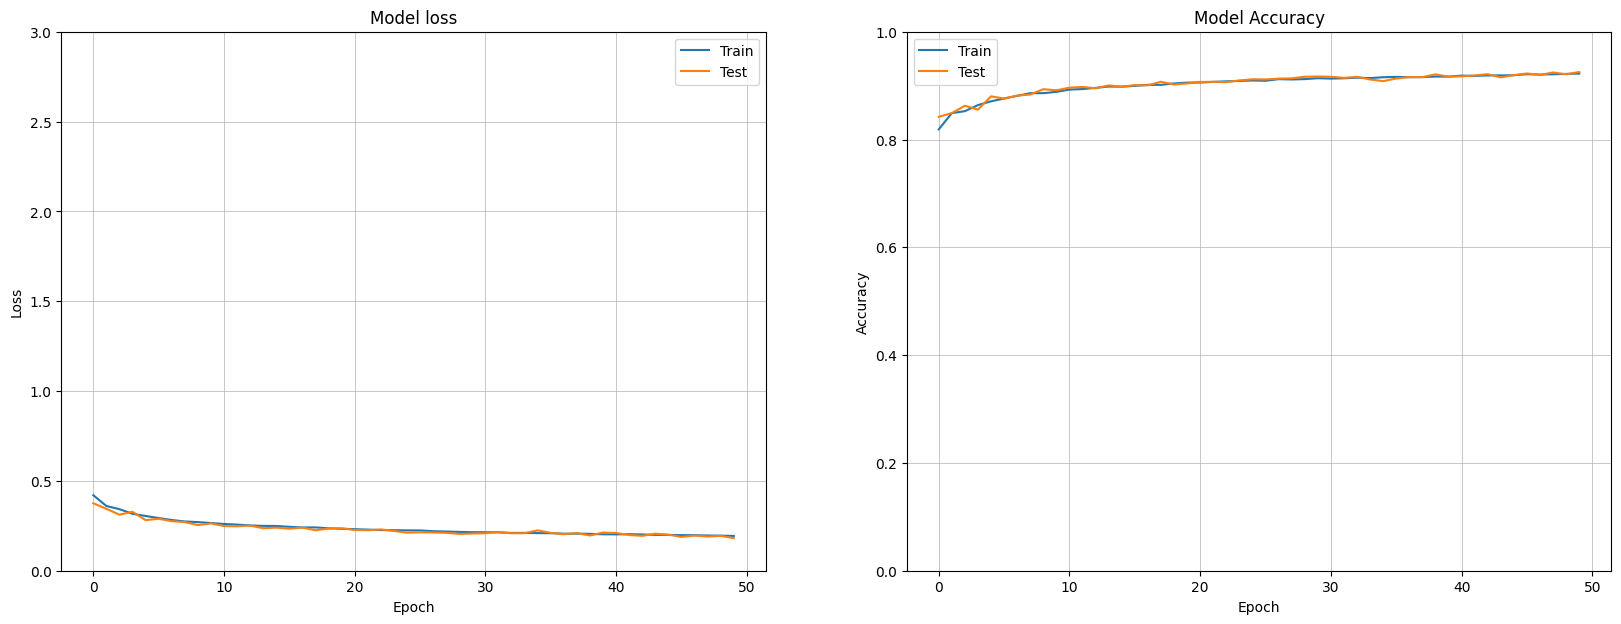

In [163]:
plot_loss_accuracy(history, title=None)


In [167]:
(history.history['accuracy'])

[0.8187975287437439,
 0.8489924073219299,
 0.8526291251182556,
 0.8638395667076111,
 0.8708627820014954,
 0.8761844635009766,
 0.8809888958930969,
 0.8860102891921997,
 0.8859935998916626,
 0.8884625434875488,
 0.8926164507865906,
 0.8936007022857666,
 0.8958194255828857,
 0.8983050584793091,
 0.8981049060821533,
 0.8995562791824341,
 0.9014079570770264,
 0.9014246463775635,
 0.9040437936782837,
 0.9055952429771423,
 0.9057620167732239,
 0.9069464802742004,
 0.9079641103744507,
 0.9086647629737854,
 0.9095489382743835,
 0.9089817404747009,
 0.9119678139686584,
 0.9114006161689758,
 0.9120846390724182,
 0.9137528538703918,
 0.91303551197052,
 0.9135860204696655,
 0.9147704243659973,
 0.9139530062675476,
 0.9155879020690918,
 0.916205108165741,
 0.9155879020690918,
 0.9158715009689331,
 0.9167723059654236,
 0.9167556166648865,
 0.918557345867157,
 0.9180067777633667,
 0.9189243316650391,
 0.9189410209655762,
 0.9192913174629211,
 0.921109676361084,
 0.9205424785614014,
 0.921126365661621

In [168]:
(history.history['val_accuracy'])

[0.8421298265457153,
 0.849002480506897,
 0.8627477288246155,
 0.855541467666626,
 0.8800960779190063,
 0.8759591579437256,
 0.881497323513031,
 0.883499026298523,
 0.8933742642402649,
 0.8913058042526245,
 0.8961766958236694,
 0.8975778818130493,
 0.895042359828949,
 0.9004470705986023,
 0.8978447914123535,
 0.9009808301925659,
 0.9005805253982544,
 0.9071862101554871,
 0.9021151661872864,
 0.9040501713752747,
 0.9069193005561829,
 0.907052755355835,
 0.9064522385597229,
 0.9096550345420837,
 0.9117901921272278,
 0.9114565849304199,
 0.9129912853240967,
 0.9135250449180603,
 0.9164609313011169,
 0.9169279932975769,
 0.9163942337036133,
 0.9143924713134766,
 0.9163274765014648,
 0.9113898873329163,
 0.9083872437477112,
 0.913124680519104,
 0.915993869304657,
 0.9156602621078491,
 0.9208647608757019,
 0.916594386100769,
 0.9171949028968811,
 0.9188629984855652,
 0.9211983680725098,
 0.9153265953063965,
 0.9194635152816772,
 0.922532856464386,
 0.9197304248809814,
 0.9244011640548706,
 0

### CNN

In [111]:
def initialize_model():
    model = Sequential([

        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)